In [9]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from tqdm import tqdm
import matplotlib.pylab as pl
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
mpl.rcParams['figure.dpi']=300

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 16,
    "font.family": "serif",
    "font.serif": 'cm10',
    'savefig.bbox' : 'tight'})

/var/folders/cw/5xff940s6559c90nyhzx9s9m0000gn/T/ipykernel_1069/1384684459.py:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


In [287]:
def array_pattern(positions,weights,values):

    array_pattern = np.zeros(len(values),dtype='complex')
    
    
    array_pattern = np.sum(np.exp(1j*np.matmul(positions[:,np.newaxis],values[np.newaxis,:]))*weights[:,np.newaxis],axis=0)

    
    #for i in range(len(values)):
        
        #array_pattern[i] = sum(weights[k]*np.exp(1j*values[i]*positions[k]) for k in range(len(positions)))
        
    return array_pattern

def get_lobes_positions(pattern,values):
    
    max_peaks = scipy.signal.find_peaks(pattern, height=None)
    min_peaks = scipy.signal.find_peaks(-pattern, height=None)
    
    # Main lobe level and main lobe position ##########################
    
    ML_center_index = np.argmax(pattern[100:len(pattern)-100])+100
    ML_position = values[ML_center_index]
    ML_level = pattern[ML_center_index]
    
    ####################################################################
    
    # Side lobes mean level and side lobes max level ###################
    SL_mean_level = 0
    SL_max_level = 0
    
    SL_levels = []
    for i in range(len(max_peaks[0])):
        
        SL_levels.append(pattern[max_peaks[0][i]])
        
    del SL_levels[len(SL_levels)//2]
    
    SL_max_level = np.max(SL_levels)
    SL_mean_level = np.mean(SL_levels)
    
    #####################################################################
    
    
    
    
    # Side lobes mean width #############################################
    
    
    SL_widths = []
    for i in range(len(min_peaks[0])-1) :
        SL_widths.append(values[min_peaks[0][i+1]]-values[min_peaks[0][i]])
    del SL_widths[len(SL_widths)//2]
   

    SL_mean_widths = np.mean(SL_widths)
    
    #######################################################################
   

            
    
    
    
    ML_level = pattern[ML_center_index]
    
    ML_3dB_index = ML_center_index
    print(ML_3dB_index)
    
    print(np.argmax(pattern))
    
    while pattern[ML_3dB_index] > ML_level-3 :
        print(ML_3dB_index,pattern[ML_3dB_index],ML_level-3)
        ML_3dB_index += 1
        
    ML_3dB = pattern[ML_3dB_index]
    
    ML_6dB_index = ML_3dB_index
    
    while pattern[ML_6dB_index] > ML_level-6 :
        ML_6dB_index += 1
        
    ML_6dB = pattern[ML_6dB_index]
    
    
    
    params = {'ML position' : ML_position,
            'ML level' : ML_level,
            'ML 3 dB width' : values[ML_3dB_index]-ML_position,
            'ML 6 dB width' : values[ML_6dB_index]-ML_position,
            'SL max level' : SL_max_level,
            'SL mean level' : SL_mean_level,
            'SL mean widths' : SL_mean_widths}
        
        
    
    
        
    return params

In [275]:
#Assume a linear array with M = 24 elements with unity weight. 
#Let the elements be uniformly spaced and try four different element spacings: d = λ/4, λ/2, λ, and 2λ. 
#Plot the results and discuss the differences as the inter-element distance varies.

# Number of elements
M=24
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/4
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Array pattern for d = λ/4, λ/2, λ, and 2λ.
pattern_1 = np.log10(np.abs(array_pattern(positions,weights,k_values))**2)
pattern_2 = np.log10(np.abs(array_pattern(positions*2,weights,k_values))**2)
pattern_3 = np.log10(np.abs(array_pattern(positions*4,weights,k_values))**2)
pattern_4 = np.log10(np.abs(array_pattern(positions*8,weights,k_values))**2)

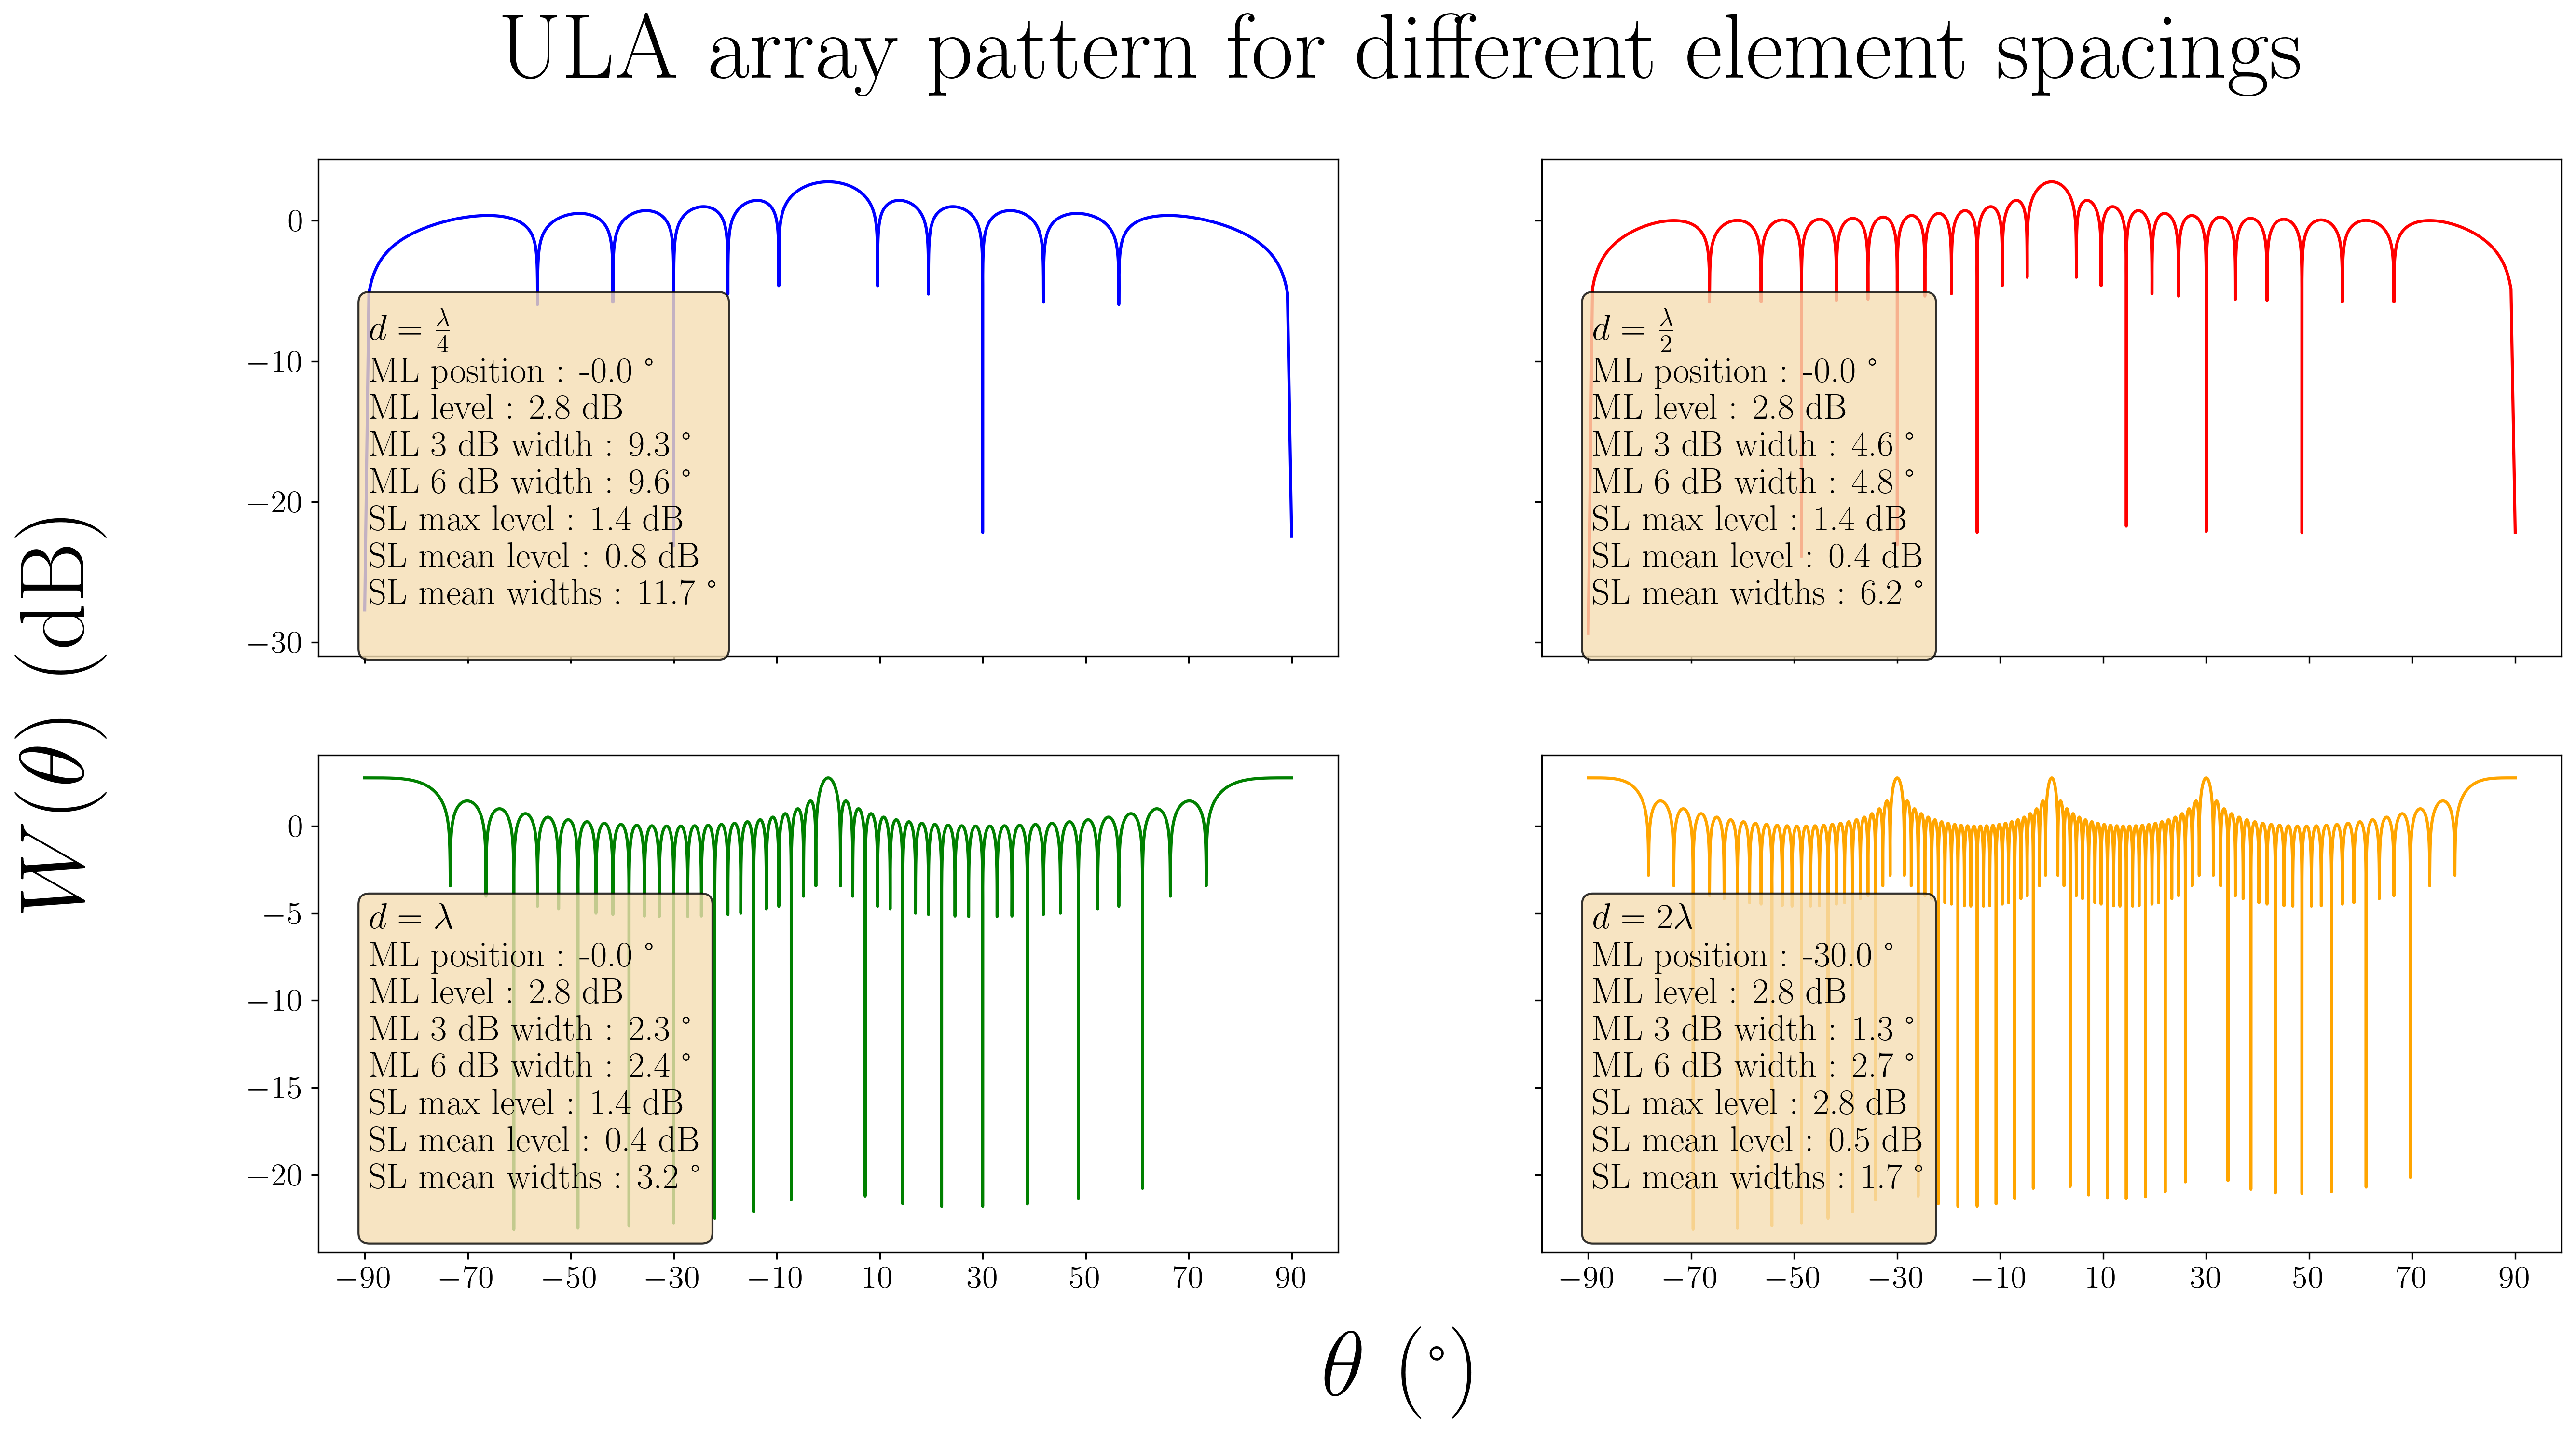

In [276]:
colors = ['blue','red','green','orange']
labels = ['$d=\\frac{\lambda}{4}$','$d=\\frac{\lambda}{2}$','$d=\lambda$','$d=2\lambda$']

patterns=[pattern_1,pattern_2,pattern_3,pattern_4]

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, sharey='row',sharex=True,figsize=(20,10))

for i in range(4) :
    
    params = get_lobes_positions(patterns[i],np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ax = axs.flat[i]
    
    ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns[i],color=colors[i],label=labels[i])
    
    ax.set_xticks(np.arange(-90,110,20))
    textstr = ''' {}
    ML position : {:.1f} °
    ML level : {:.1f} dB
    ML 3 dB width : {:.1f} °
    ML 6 dB width : {:.1f} °
    SL max level : {:.1f} dB
    SL mean level : {:.1f} dB 
    SL mean widths : {:.1f} °
    '''.format(labels[i],params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])
    
    
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
    


fig.supxlabel('$\\theta$ (°)',fontsize=46)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=46)
fig.suptitle('ULA array pattern for different element spacings',fontsize=46)
plt.savefig('images/array/ula_patterns.png',dpi=300)

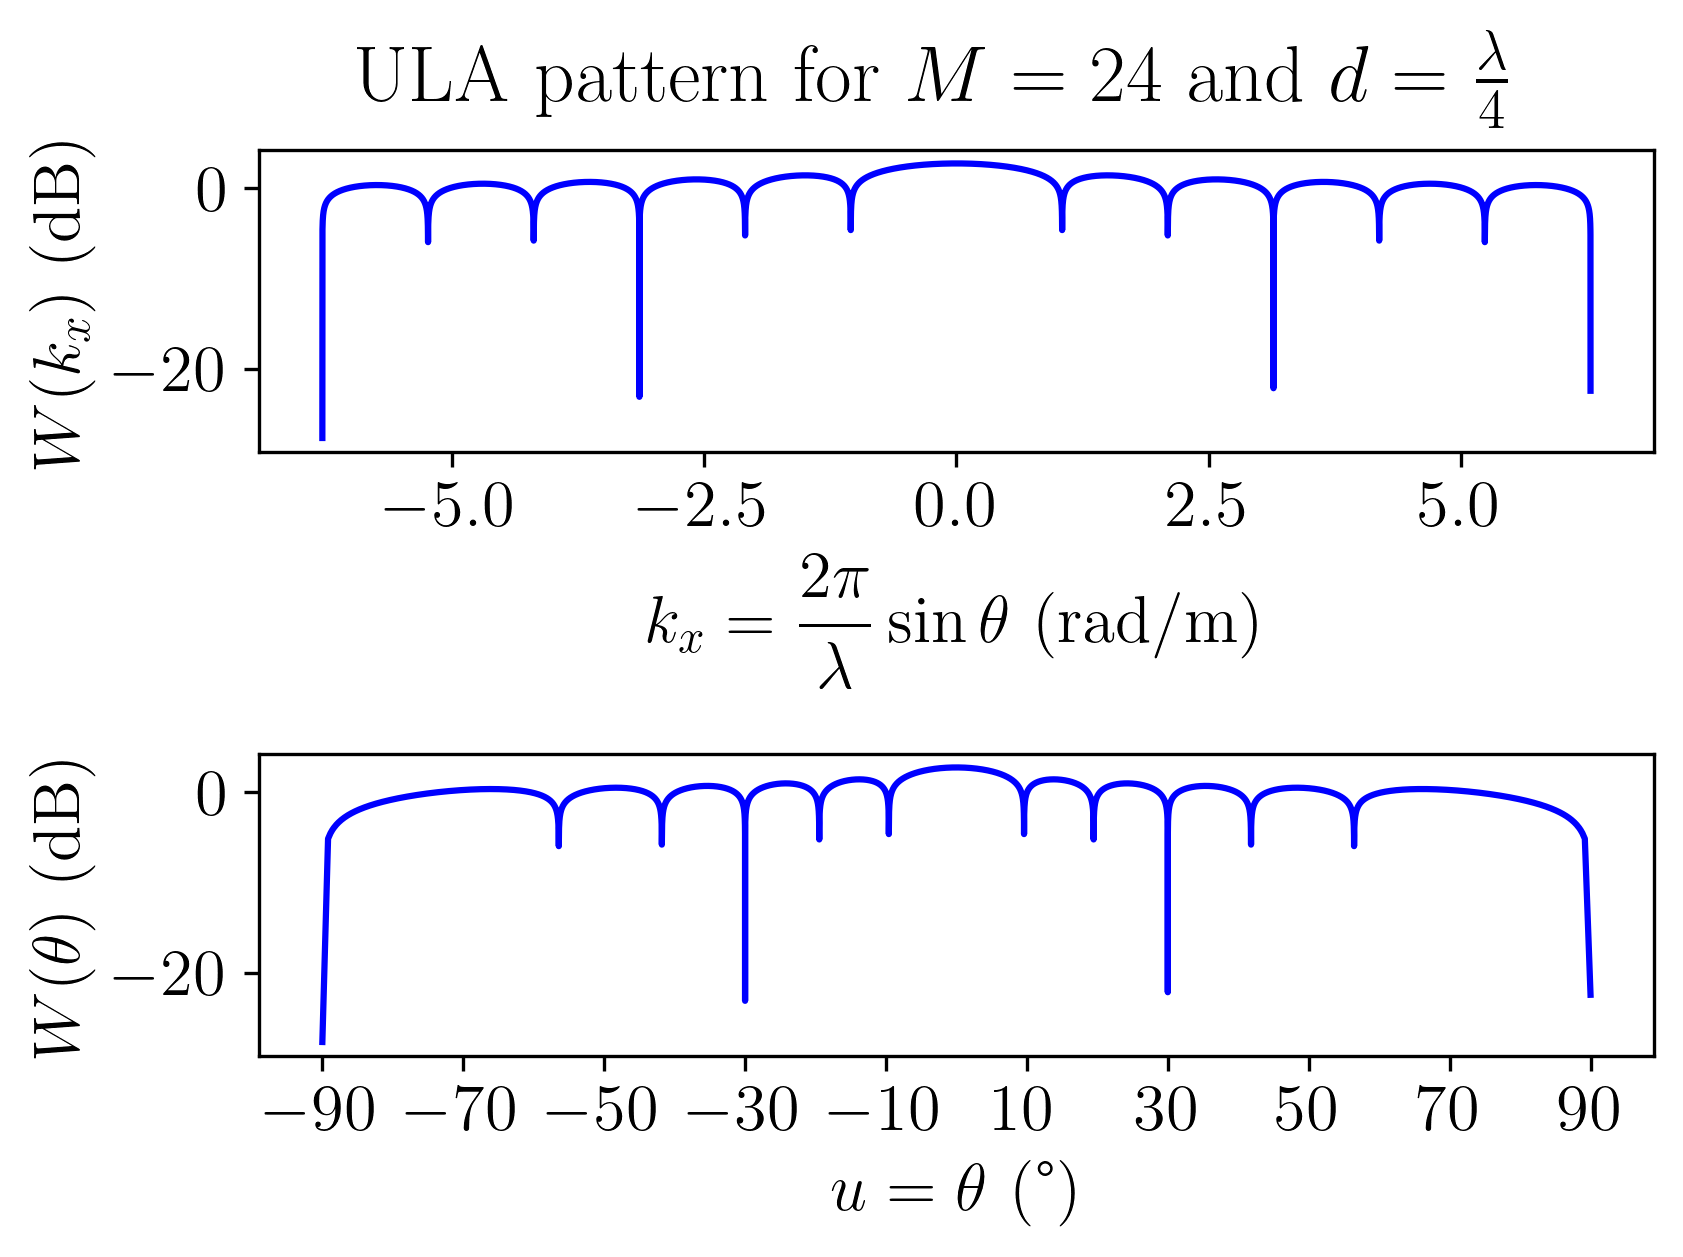

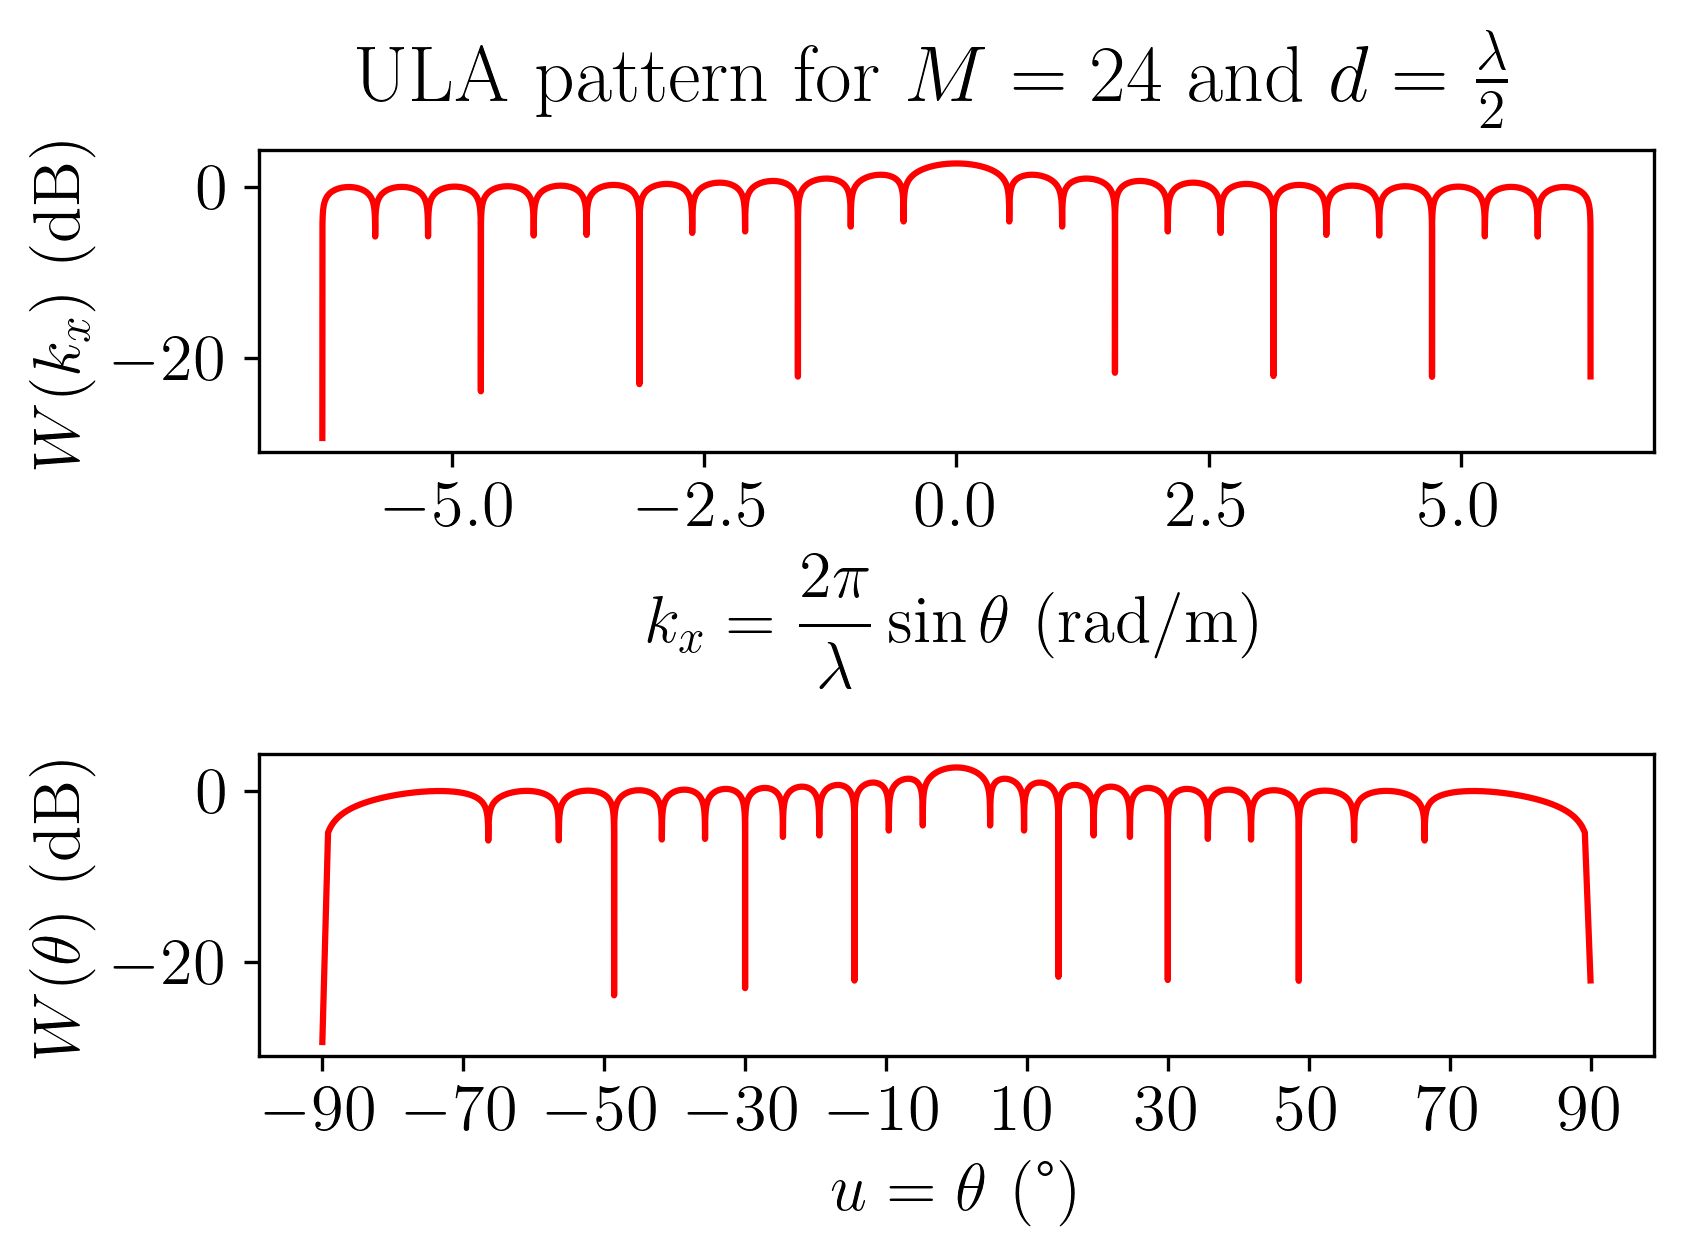

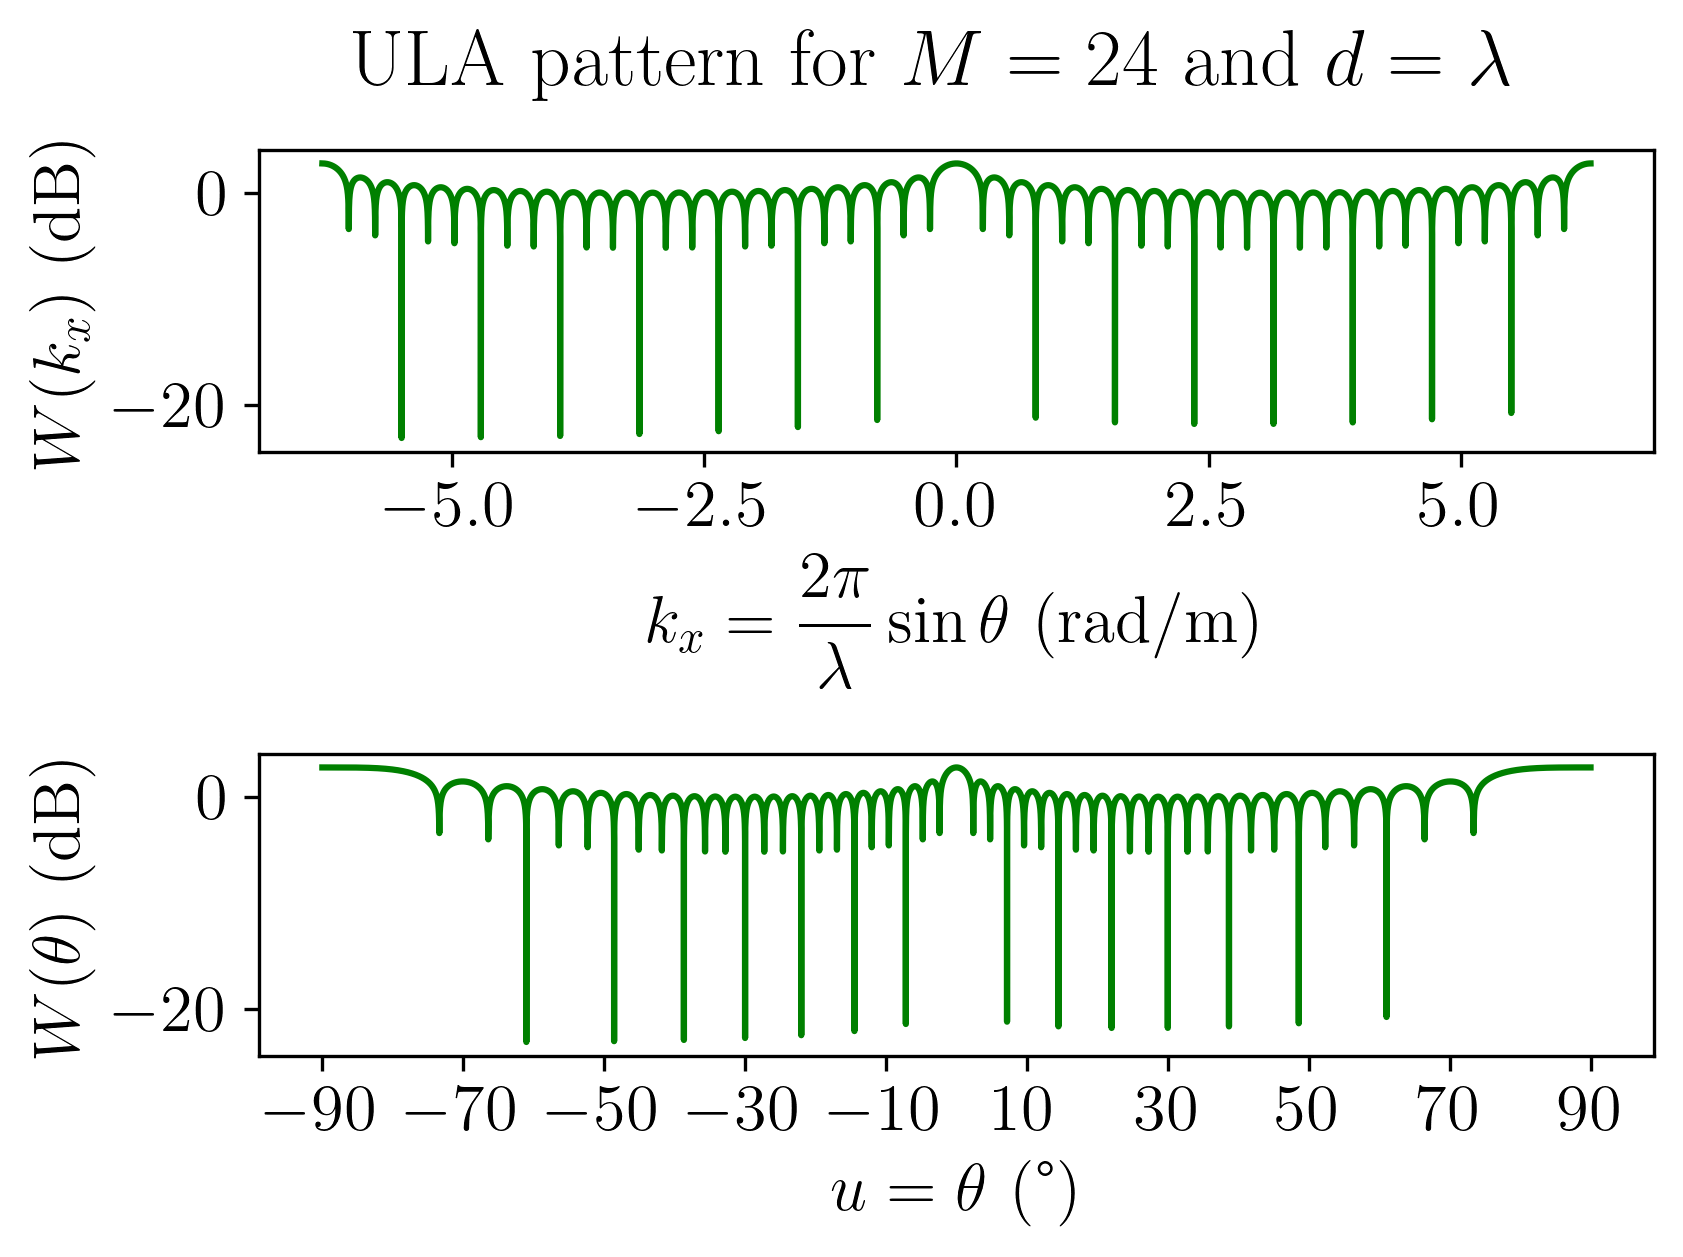

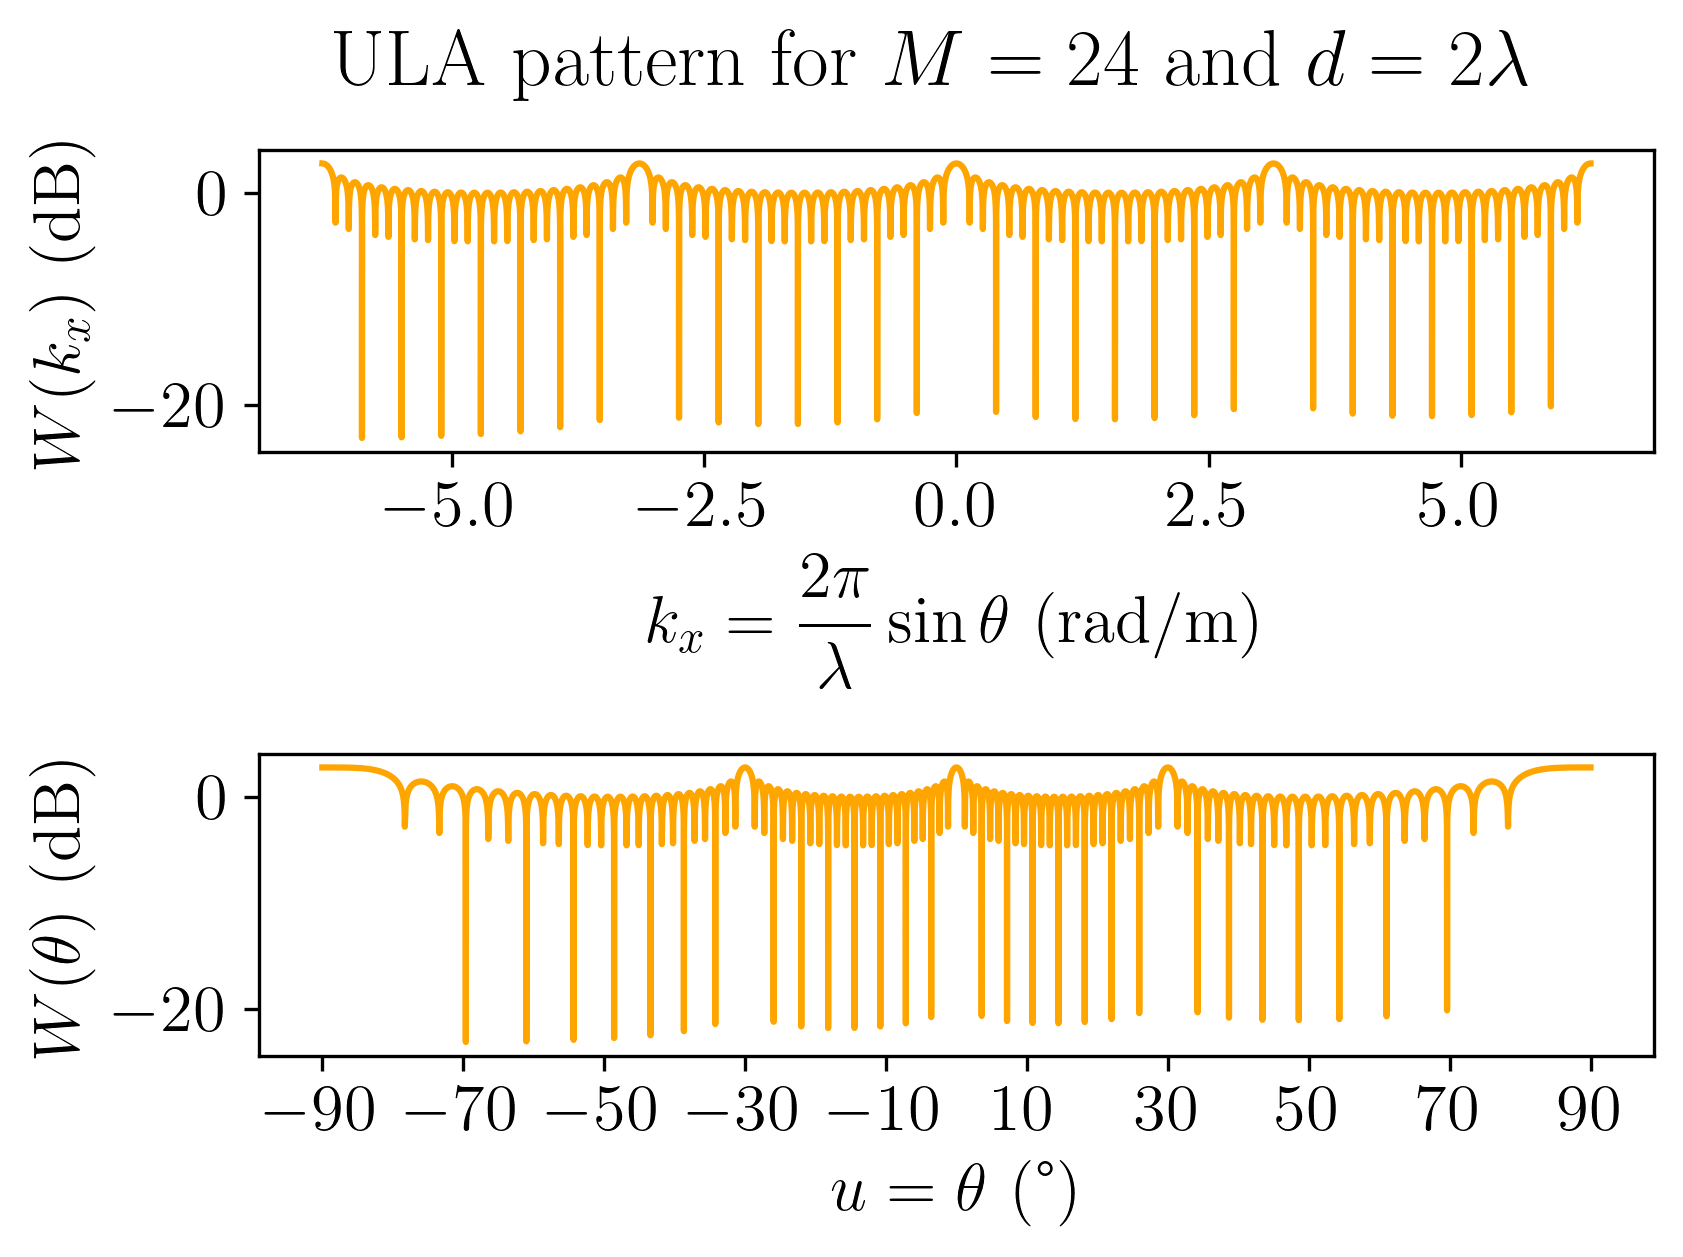

In [277]:
colors = ['blue','red','green','orange']
labels = ['$d=\\frac{\lambda}{4}$','$d=\\frac{\lambda}{2}$','$d=\lambda$','$d=2\lambda$']

patterns=[pattern_1,pattern_2,pattern_3,pattern_4]

for i in range(4):
    fig, ax = plt.subplots(2)
    ax1,ax2 = ax.flat

    fig.suptitle('ULA pattern for $M=24$ and {}'.format(labels[i]))
    ax1.plot(k_values,patterns[i],color=colors[i])

    ax1.set_xlabel('$k_x=\dfrac{2\pi}{\lambda}\sin\\theta$ (rad/m)')
    ax1.set_ylabel('$W(k_x)$ (dB)')

    ax2.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns[i],color=colors[i])
    ax2.set_xlabel('$u=\\theta$ (°)')
    ax2.set_ylabel('$W(\\theta)$ (dB)')
    ax2.set_xticks(np.arange(-90,110,20))
    fig.subplots_adjust(hspace=1)
    fig.savefig('images/array/ula_pattern' + labels[i] + '.png',dpi=300)

In [239]:
# Number of elements
M=24
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Beta values vector
beta_vector = np.arange(0.5,5.5,0.5)

In [240]:
SL_max_levels = []
ML_3dB_widths = []
ML_6dB_widths = []
White_noise_gain = []
patterns_kaiser = []

for beta in tqdm(beta_vector) :
    
    window = scipy.signal.windows.kaiser(M=24, beta=beta, sym=True)
    pattern_kaiser = np.log10(np.abs(array_pattern(positions,weights*window,k_values))**2) 
    patterns_kaiser.append(pattern_kaiser)
    params = get_lobes_positions(pattern_kaiser,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)

                                 
    SL_max_levels.append(params['SL max level'])
    ML_3dB_widths.append(params['ML 3 dB width'])
    ML_6dB_widths.append(params['ML 6 dB width'])
    White_noise_gain.append(np.linalg.norm(weights*window)**(-2))


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 88.55it/s]


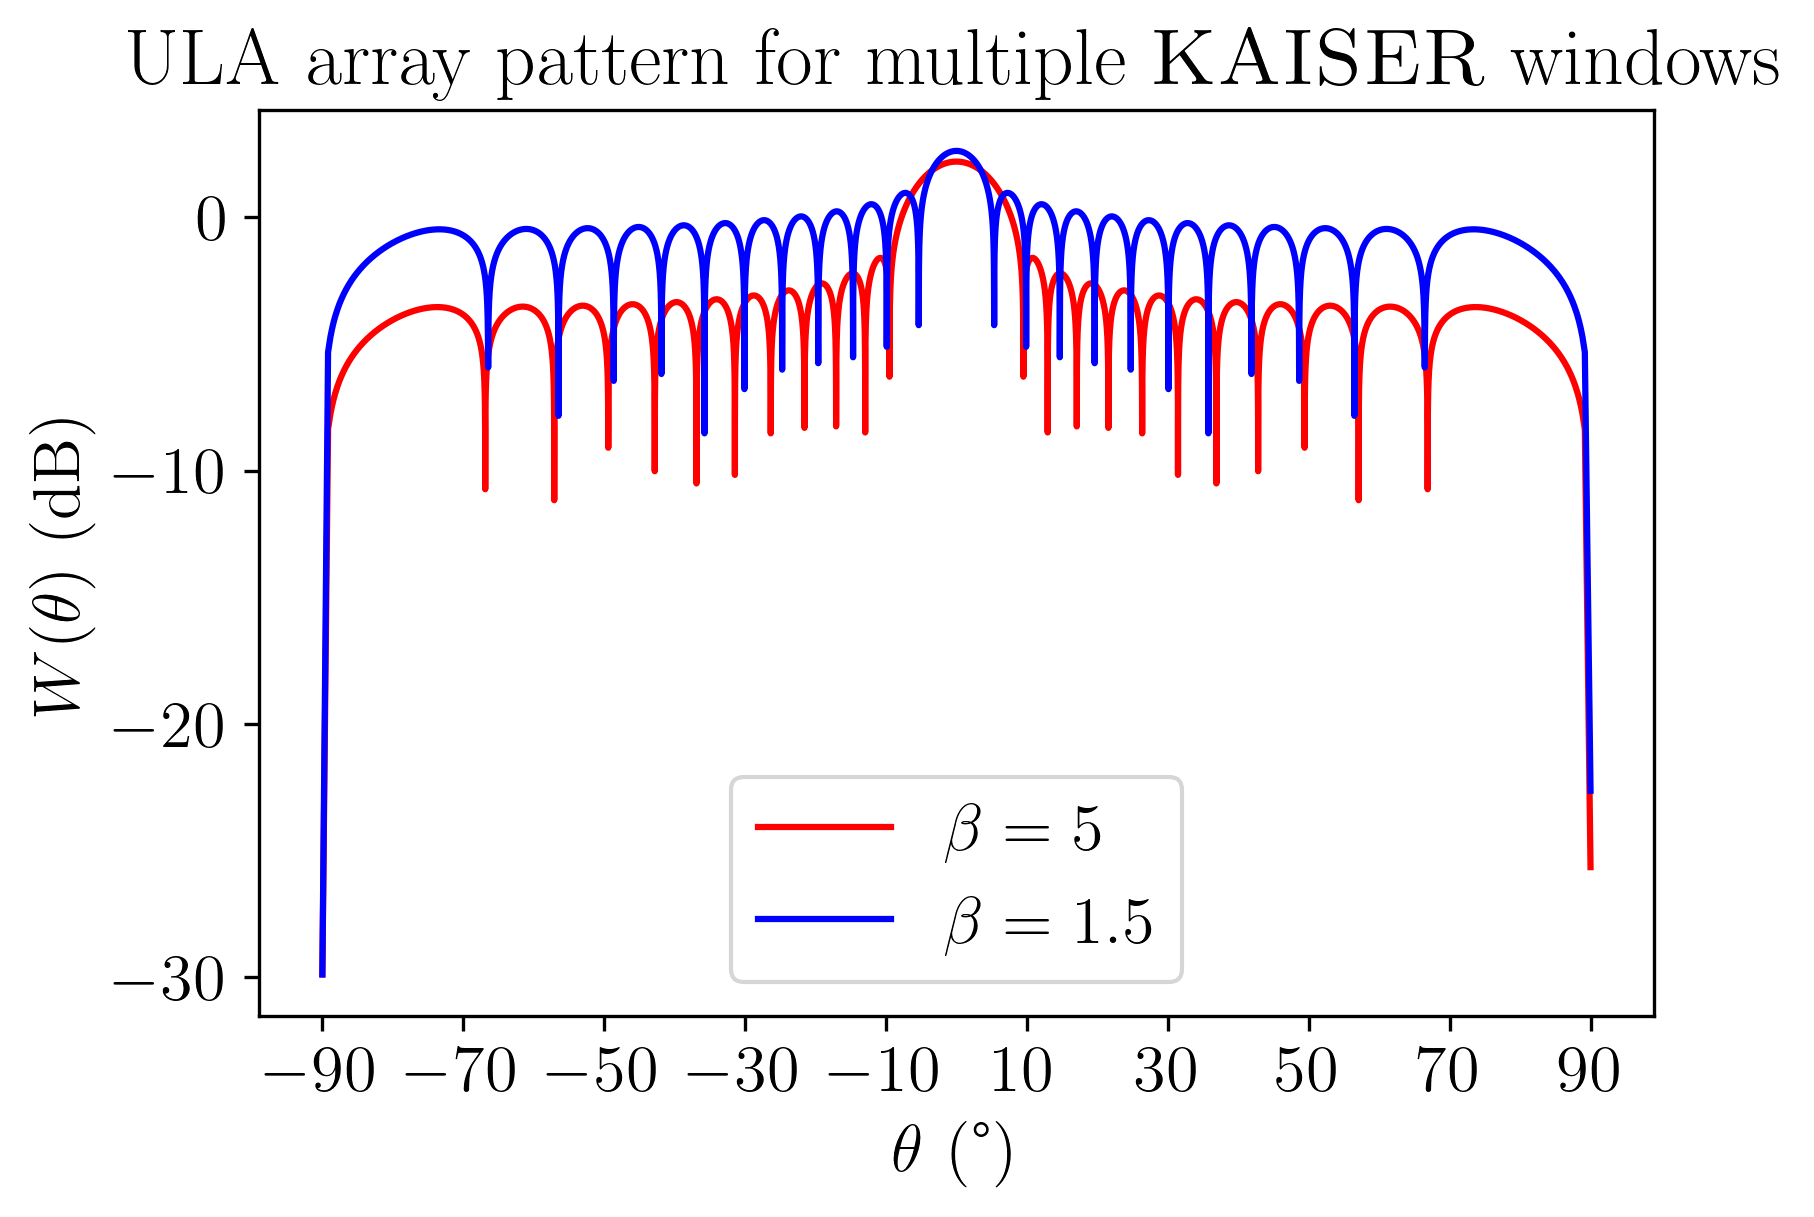

In [241]:
plt.title('''ULA array pattern for multiple \\textsc{KAISER} windows''')
plt.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns_kaiser[9],label='$\\beta=5$',color='red')
plt.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,patterns_kaiser[2],label='$\\beta=1.5$',color='blue')
plt.xlabel('$\\theta$ (°)')
plt.ylabel('$W(\\theta)$ (dB)')
plt.xticks(np.arange(-90,110,20))
plt.legend(loc='best')

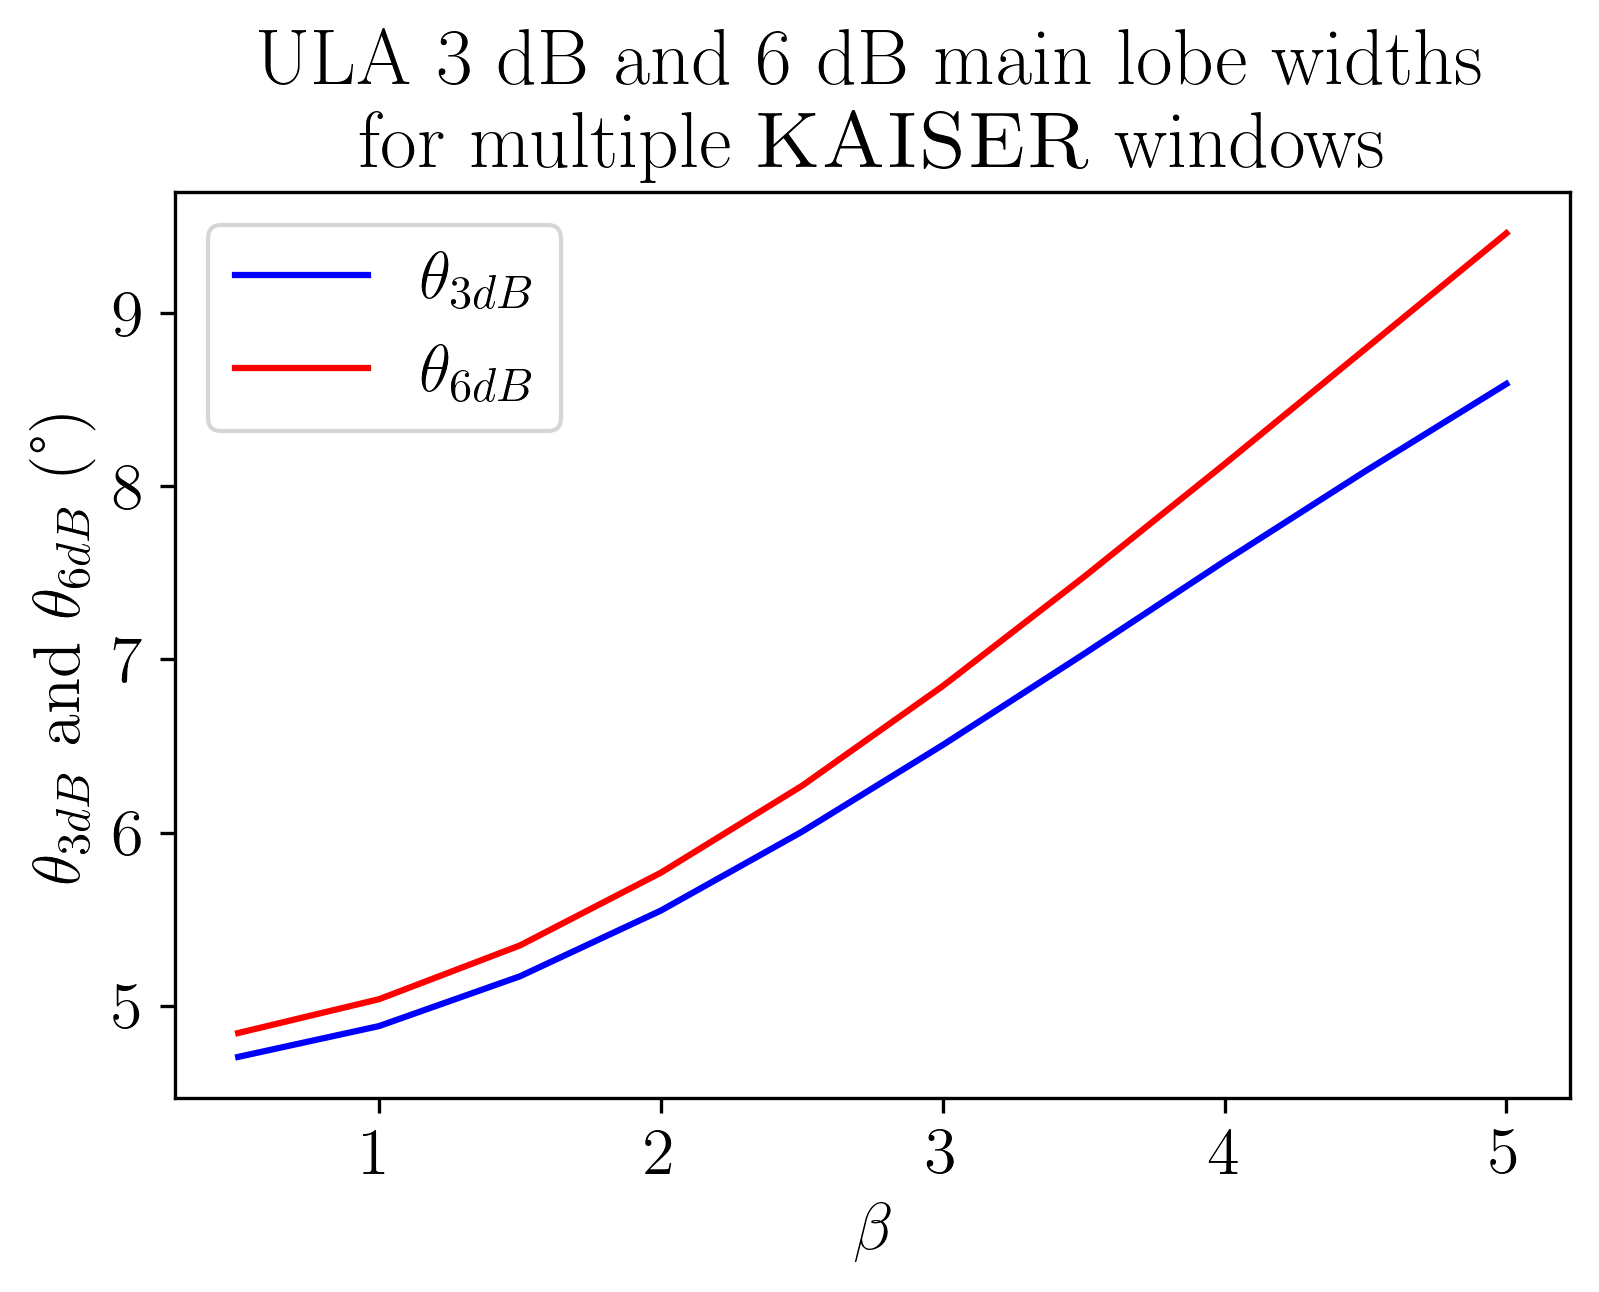

In [242]:
plt.plot(beta_vector,ML_3dB_widths,color='blue',label='$\\theta_{3dB}$')
plt.plot(beta_vector,ML_6dB_widths,color='red',label='$\\theta_{6dB}$')
plt.xlabel('$\\beta$')
plt.ylabel('$\\theta_{3dB}$ and $\\theta_{6dB}$ (°)')
plt.legend(loc='best')
plt.title('''ULA 3 dB and 6 dB main lobe widths 
for multiple \\textsc{KAISER} windows''')
plt.savefig('images/array/ula_kaiser_lobe_widths.png',dpi=300)

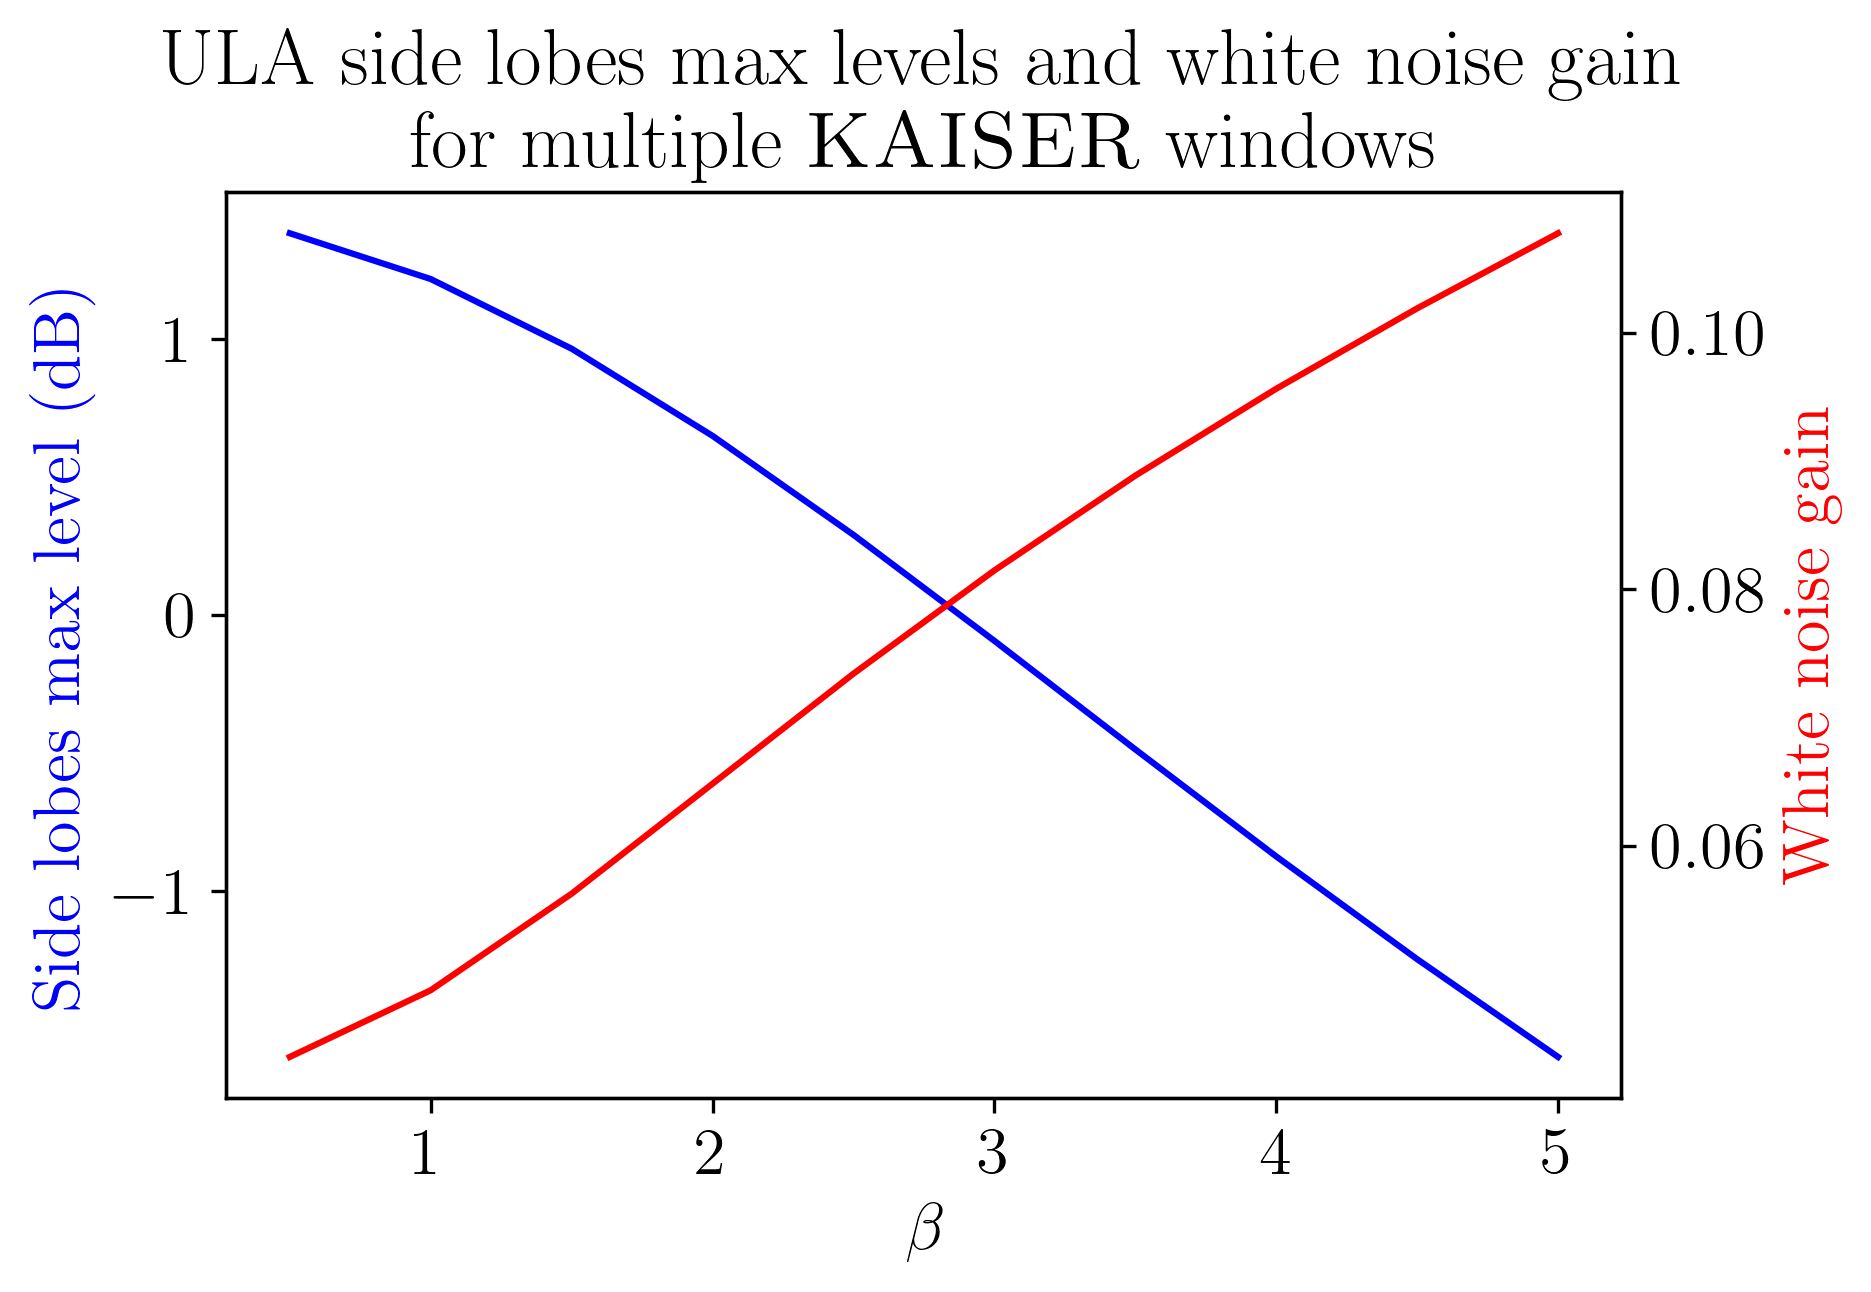

In [243]:
fig, ax1 = plt.subplots()

plt.title('''ULA side lobes max levels and white noise gain 
for multiple \\textsc{KAISER} windows''')
ax2 = ax1.twinx()
ax1.plot(beta_vector,SL_max_levels,color='blue',label='Side lobes max level')
ax2.plot(beta_vector,White_noise_gain,color='red',label='$hite noise gain G')

ax1.set_xlabel('$\\beta$')
ax1.set_ylabel('Side lobes max level (dB)',color='blue')
ax2.set_ylabel('White noise gain',color='red')

plt.savefig('images/array/ula_kaiser_SL_max_white_noise_gain.png',dpi=300)

In [244]:
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# ElPos vector
n = np.arange(1,24,2)
e_n = np.array([-0.017,-0.538,-0.617,-1.0,-1.142,-1.372,-1.487,-1.555,-1.537,-1.3,-0.772,-0.242])
d_n = (e_n + n/2)*spacing
ElPos = np.concatenate((-np.flip(d_n),d_n))


In [245]:
pattern_e = np.log10(np.abs(array_pattern(ElPos,weights,k_values))**2)

10000
10000
10000 2.760422483423212 -0.23957751657678816
10001 2.760420923046804 -0.23957751657678816
10002 2.7604162419128255 -0.23957751657678816
10003 2.7604084400070343 -0.23957751657678816
10004 2.7603975173056936 -0.23957751657678816
10005 2.7603834737755704 -0.23957751657678816
10006 2.760366309373936 -0.23957751657678816
10007 2.760346024048566 -0.23957751657678816
10008 2.7603226177377382 -0.23957751657678816
10009 2.7602960903702316 -0.23957751657678816
10010 2.7602664418653267 -0.23957751657678816
10011 2.7602336721328027 -0.23957751657678816
10012 2.7601977810729386 -0.23957751657678816
10013 2.7601587685765083 -0.23957751657678816
10014 2.760116634524781 -0.23957751657678816
10015 2.760071378789521 -0.23957751657678816
10016 2.760023001232981 -0.23957751657678816
10017 2.7599715017079056 -0.23957751657678816
10018 2.759916880057525 -0.23957751657678816
10019 2.759859136115555 -0.23957751657678816
10020 2.7597982697061925 -0.23957751657678816
10021 2.7597342806441154 -0.239

10793 1.5404846120580618 -0.23957751657678816
10794 1.5364397418201137 -0.23957751657678816
10795 1.5323816239010726 -0.23957751657678816
10796 1.5283101820232448 -0.23957751657678816
10797 1.5242253391256246 -0.23957751657678816
10798 1.5201270173529746 -0.23957751657678816
10799 1.5160151380447235 -0.23957751657678816
10800 1.5118896217236657 -0.23957751657678816
10801 1.507750388084456 -0.23957751657678816
10802 1.5035973559819076 -0.23957751657678816
10803 1.499430443419073 -0.23957751657678816
10804 1.4952495675351138 -0.23957751657678816
10805 1.4910546445929607 -0.23957751657678816
10806 1.4868455899667332 -0.23957751657678816
10807 1.482622318128946 -0.23957751657678816
10808 1.4783847426374792 -0.23957751657678816
10809 1.4741327761223073 -0.23957751657678816
10810 1.469866330271987 -0.23957751657678816
10811 1.4655853158198984 -0.23957751657678816
10812 1.461289642530226 -0.23957751657678816
10813 1.4569792191836908 -0.23957751657678816
10814 1.452653953563004 -0.239577516576

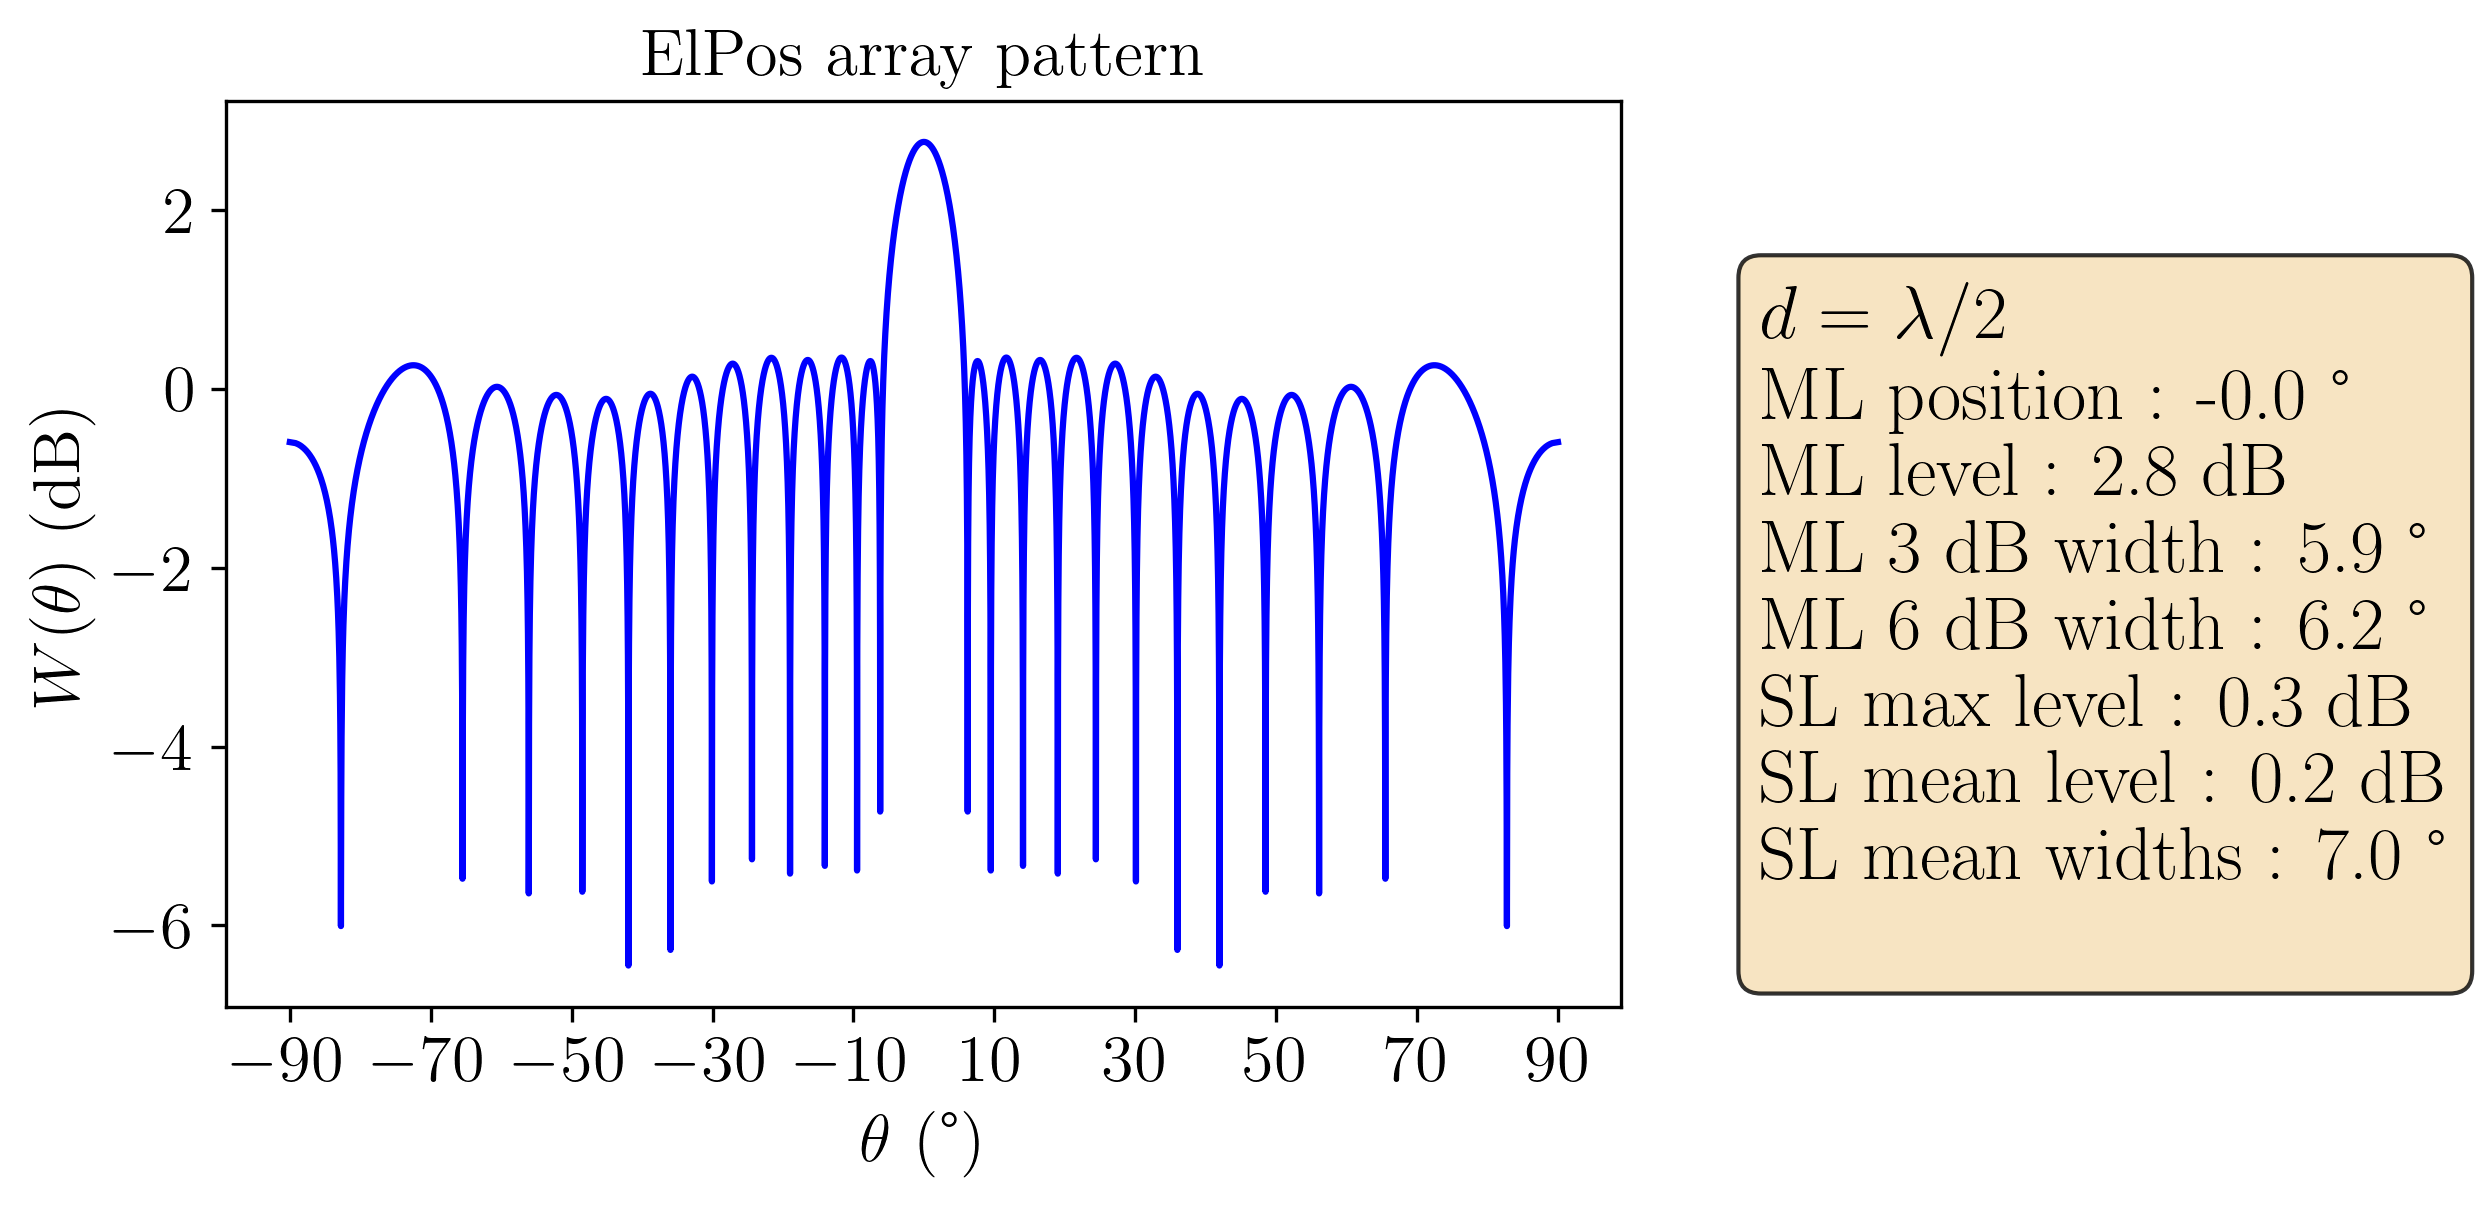

In [292]:
fig,ax1 = plt.subplots(1)


ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern_e,color='blue')

ax1.set_xlabel('$\\theta$ (°)',fontsize=16)
ax1.set_ylabel('$W(\\theta)$ (dB)',fontsize=16)
ax1.set_title('ElPos array pattern',fontsize=16)
ax1.set_xticks(np.arange(-90,110,20))
params = get_lobes_positions(pattern_e,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)

textstr = '''$d=\lambda/2$ 
    ML position : {:.1f} °
    ML level : {:.1f} dB
    ML 3 dB width : {:.1f} °
    ML 6 dB width : {:.1f} °
    SL max level : {:.1f} dB
    SL mean level : {:.1f} dB 
    SL mean widths : {:.1f} °
    '''.format(params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)
    
plt.savefig('images/array/ElPos_array_pattern.png',dpi=300)

In [247]:
## Thinning UNIFORM

In [248]:


d = lambda_/2

NEls = 101



def get_ElPos(NPos):
    
    pos = []
    
    while len(pos) < NPos - 2 :

            pos = np.unique(np.ceil((NEls-2)*np.random.uniform(0,1,(1,NPos*2))))
    
   
    ElPos = np.zeros(NPos)
    
    np.random.shuffle(pos)
    

    ElPos[0]=-(NEls-1)/2
    ElPos[1:-2] = np.sort(pos[1:NPos-2])-(NEls-1)/2
    ElPos[-1]=(NEls-1)/2

    ElPos = ElPos*d
    
    return ElPos

def get_ElPos_normal(NPos):
    
    pos = []
    
    while len(pos) < NPos - 2 :

            tmp = np.ceil((NEls/6*np.random.normal(0,1,(1,NPos*2))))
            pos = np.unique(tmp[abs(tmp)<(NEls-1)/2])
    
   
    ElPos = np.zeros(NPos)
    
    np.random.shuffle(pos)
    

    ElPos[0]=-(NEls-1)/2
    ElPos[1:-2] = np.sort(pos[1:NPos-2])
    ElPos[-1]=(NEls-1)/2

    ElPos = ElPos*d
    
    return ElPos




100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.12it/s]


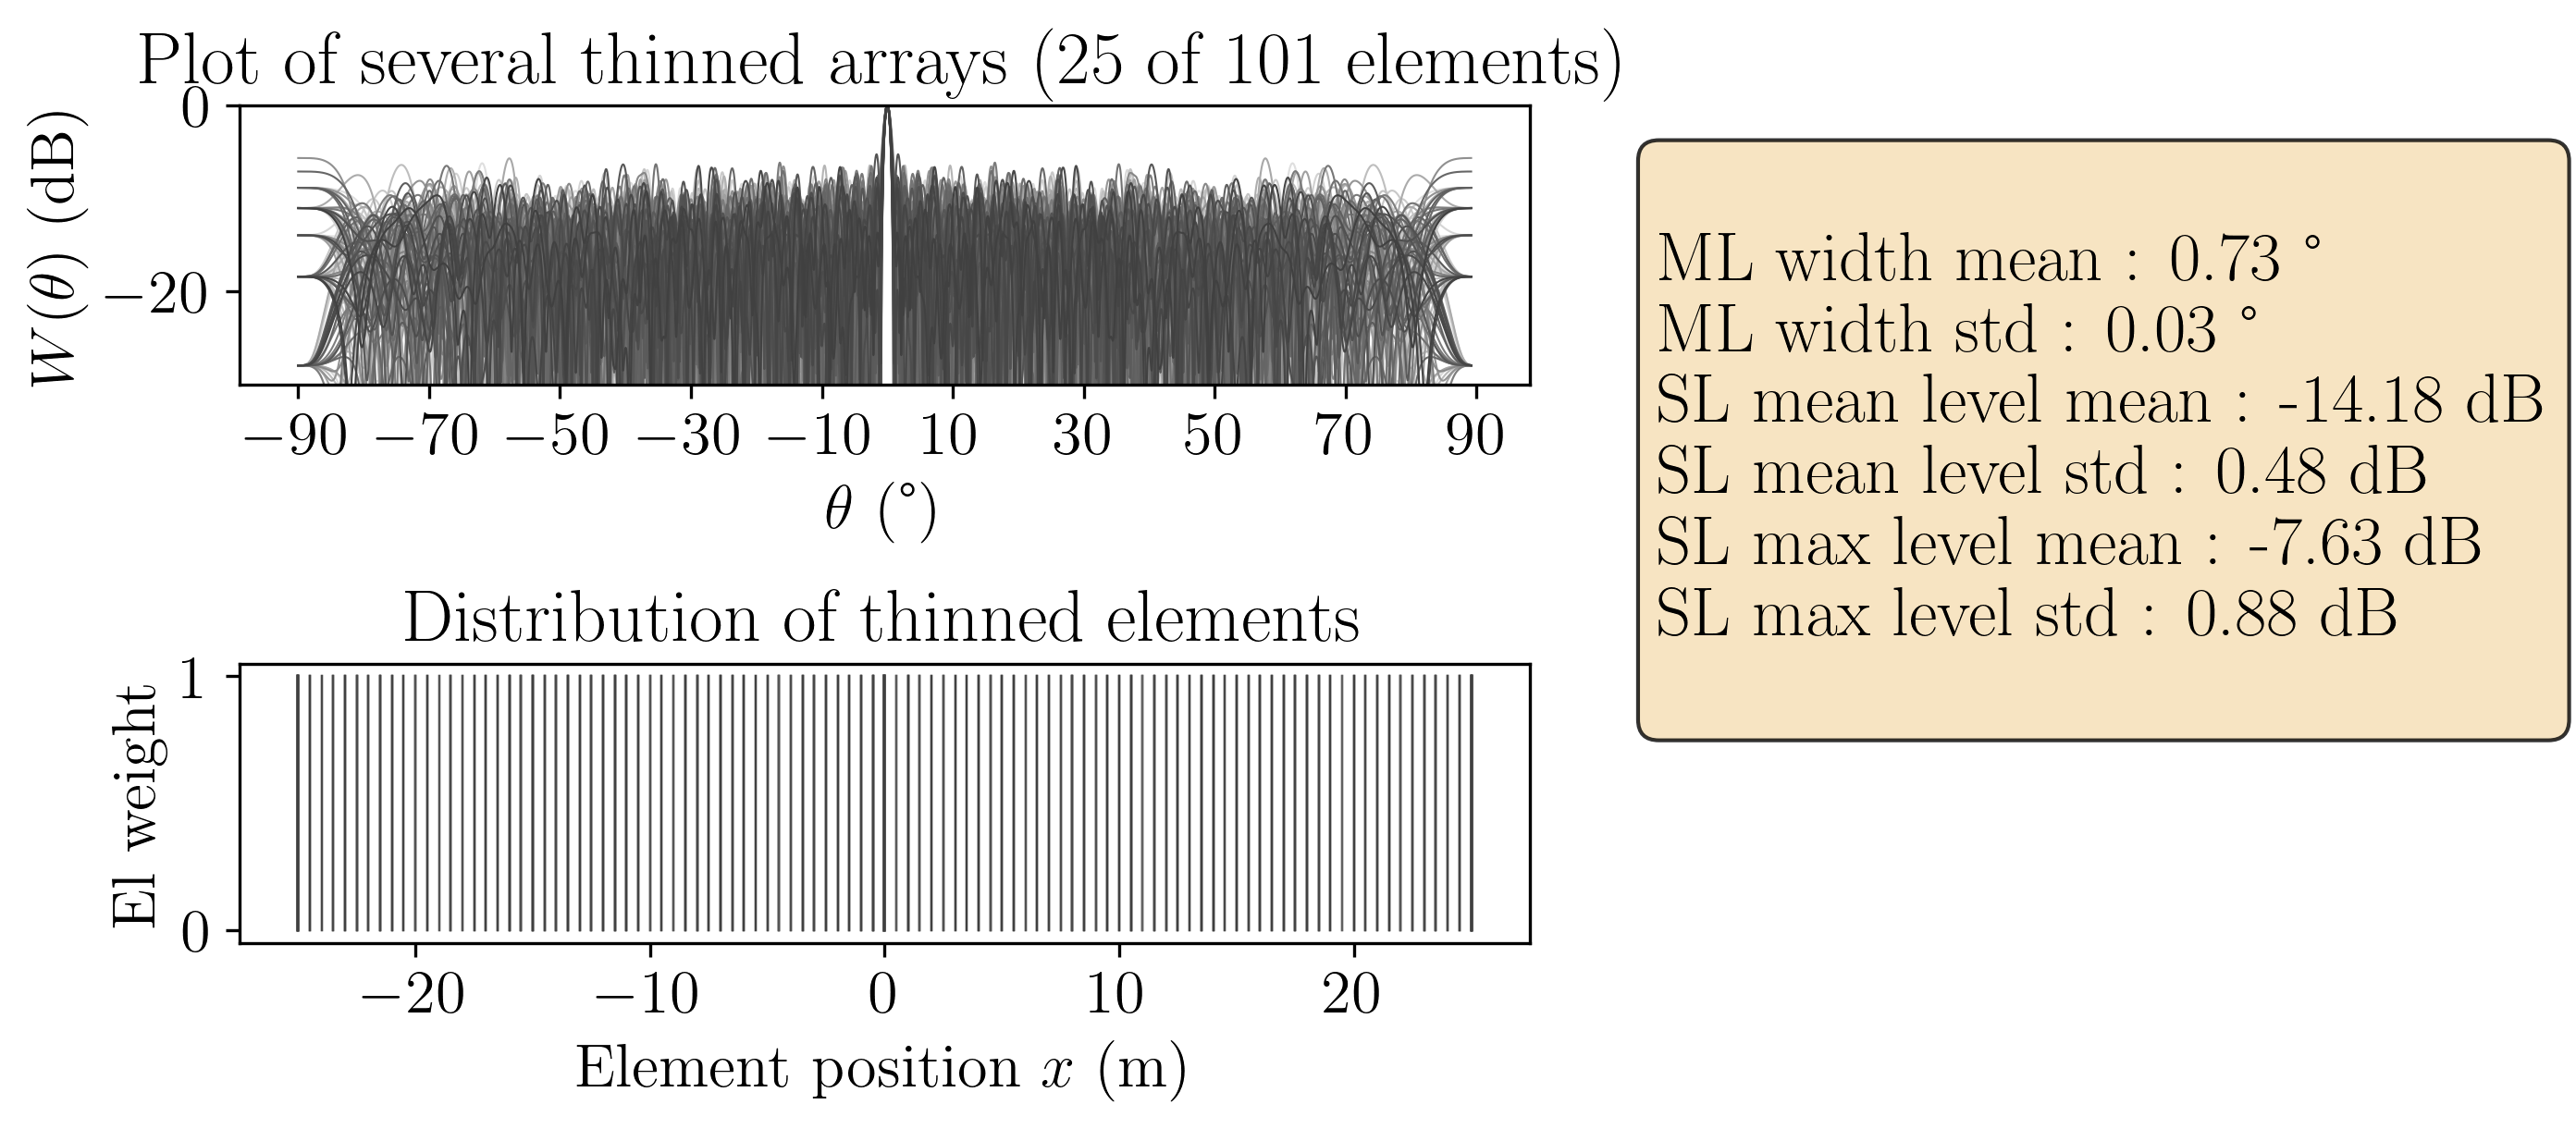

In [249]:
N = 100
M = 101
NPos = 25

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)

fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_unif_array_pattern_'+str(NPos)+'.png',dpi=300)

In [250]:
print('Main lobe width')
ML_width_mean = np.mean(ML_widths_list)
ML_width_std = np.std(ML_widths_list)
print('Mean : {:.2f} °'.format(ML_width_mean))
print('Std : {:.2f} °'.format(ML_width_std))

print('Side lobes mean level')
SL_mean_level_mean = np.mean(SL_mean_levels_list)
SL_mean_level_std = np.std(SL_mean_levels_list)
print('Mean : {:.2f} dB'.format(SL_mean_level_mean))
print('Std : {:.2f} dB'.format(SL_mean_level_std))

print('Side lobes max level')
SL_max_level_mean = np.mean(SL_max_levels_list)
SL_max_level_std = np.std(SL_max_levels_list)
print('Mean : {:.2f} dB'.format(SL_max_level_mean))
print('Std : {:.2f} dB'.format(SL_max_level_std))


Main lobe width
Mean : 0.73 °
Std : 0.03 °
Side lobes mean level
Mean : -14.18 dB
Std : 0.48 dB
Side lobes max level
Mean : -7.63 dB
Std : 0.88 dB


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.31it/s]


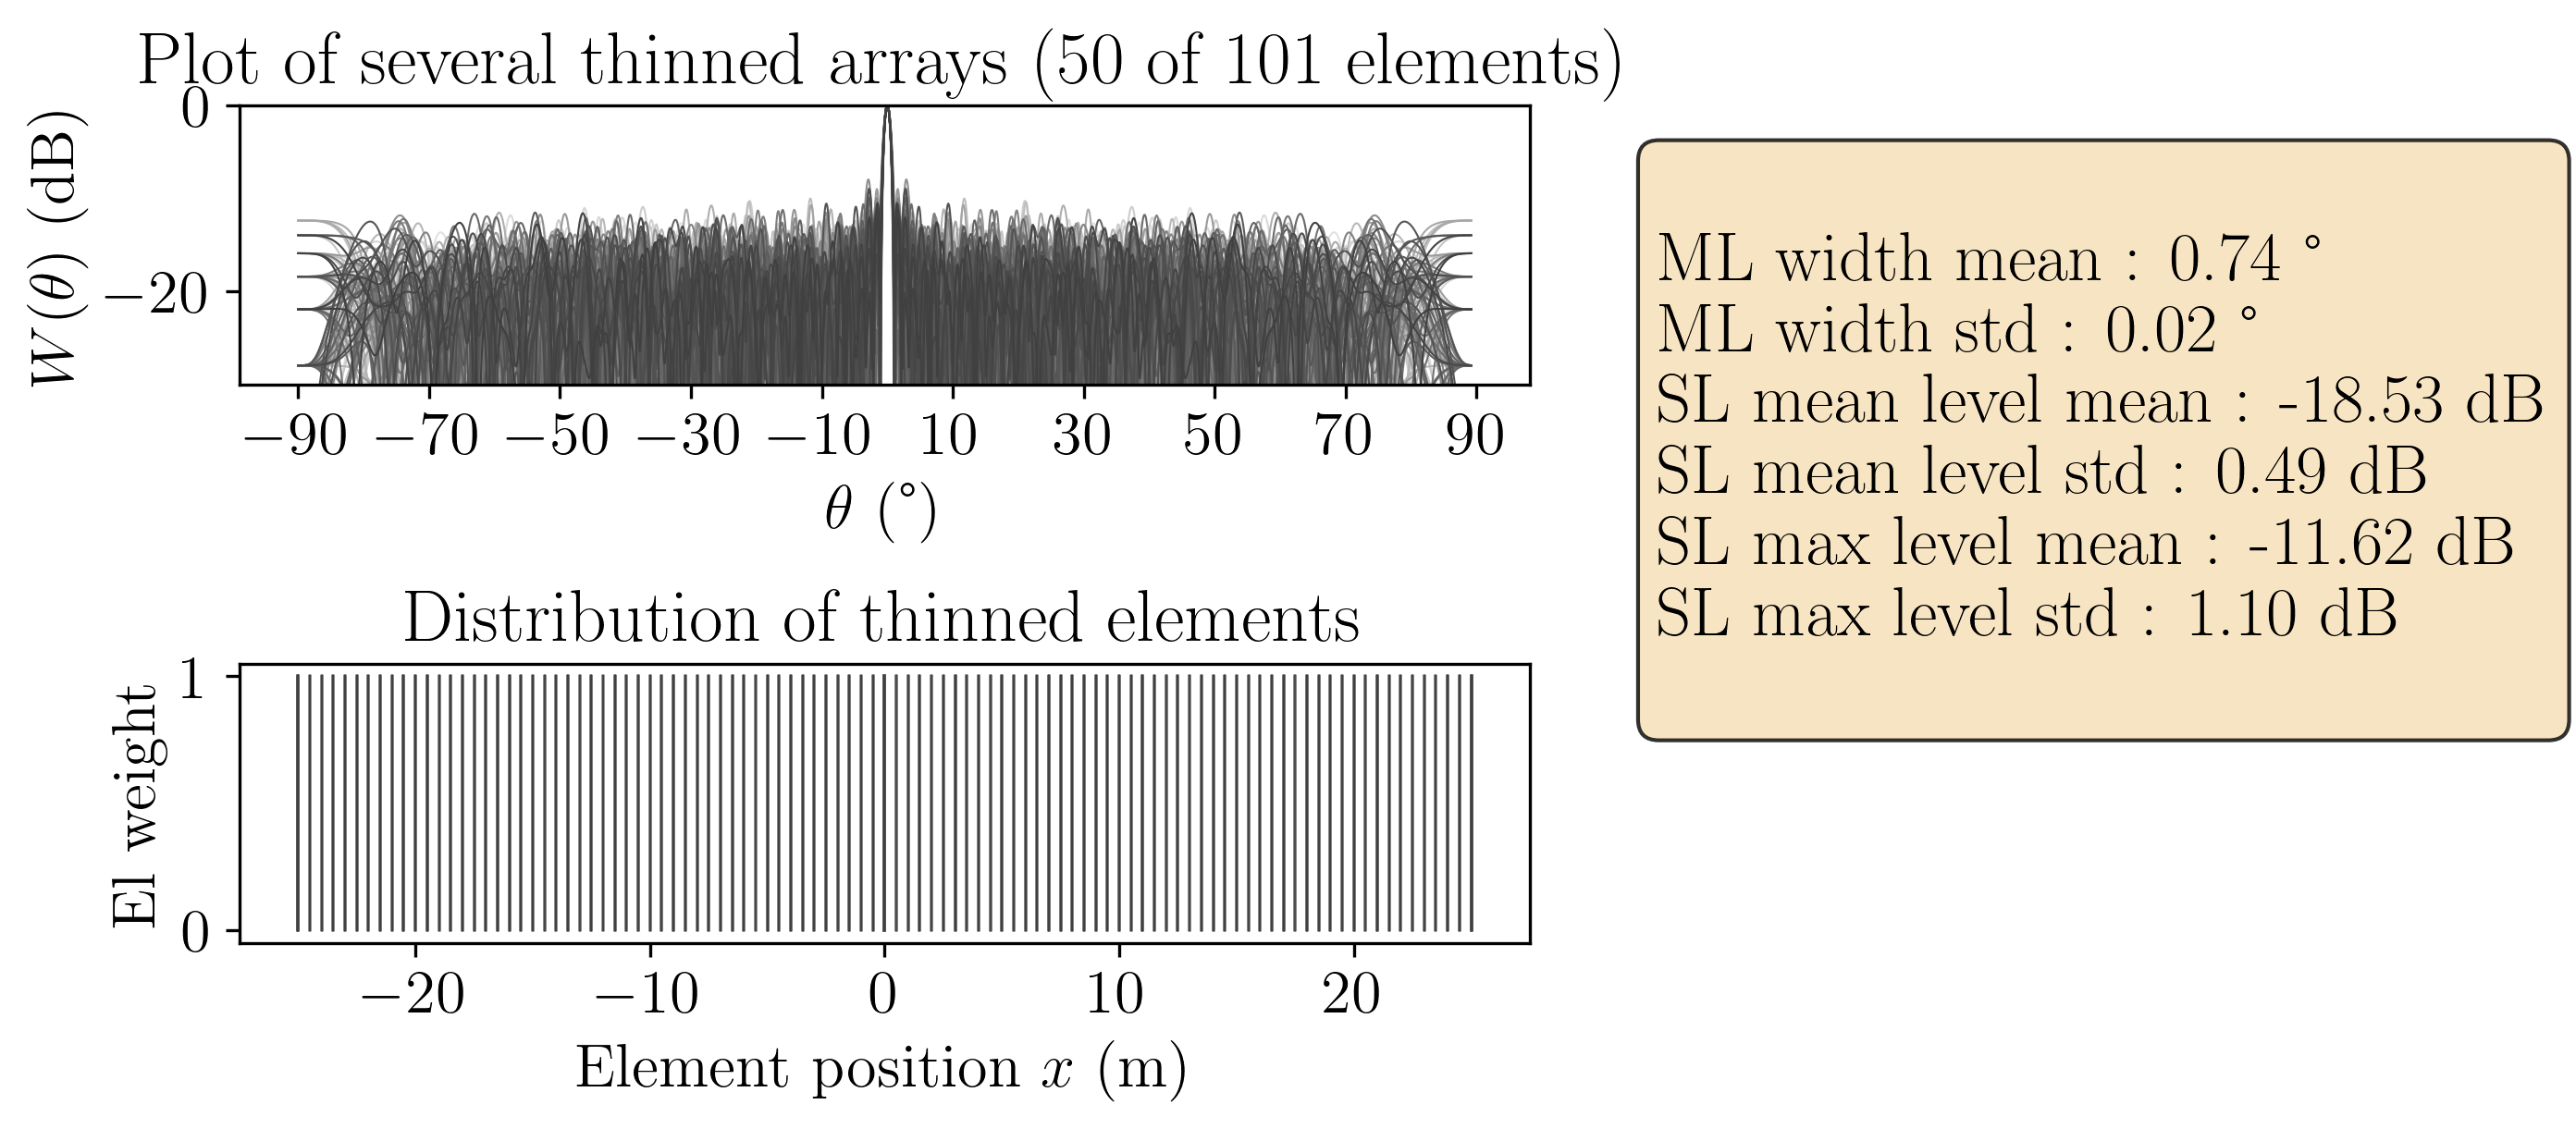

In [251]:
M = 101
NPos = 50
colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    ElPos = get_ElPos(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)




fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_unif_array_pattern_'+str(NPos)+'.png',dpi=300)

In [252]:
print('Main lobe width')
ML_width_mean = np.mean(ML_widths_list)
ML_width_std = np.std(ML_widths_list)
print('Mean : {:.2f} °'.format(ML_width_mean))
print('Std : {:.2f} °'.format(ML_width_std))

print('Side lobes mean level')
SL_mean_level_mean = np.mean(SL_mean_levels_list)
SL_mean_level_std = np.std(SL_mean_levels_list)
print('Mean : {:.2f} dB'.format(SL_mean_level_mean))
print('Std : {:.2f} dB'.format(SL_mean_level_std))

print('Side lobes max level')
SL_max_level_mean = np.mean(SL_max_levels_list)
SL_max_level_std = np.std(SL_max_levels_list)
print('Mean : {:.2f} dB'.format(SL_max_level_mean))
print('Std : {:.2f} dB'.format(SL_max_level_std))



Main lobe width
Mean : 0.74 °
Std : 0.02 °
Side lobes mean level
Mean : -18.53 dB
Std : 0.49 dB
Side lobes max level
Mean : -11.62 dB
Std : 1.10 dB


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.27it/s]


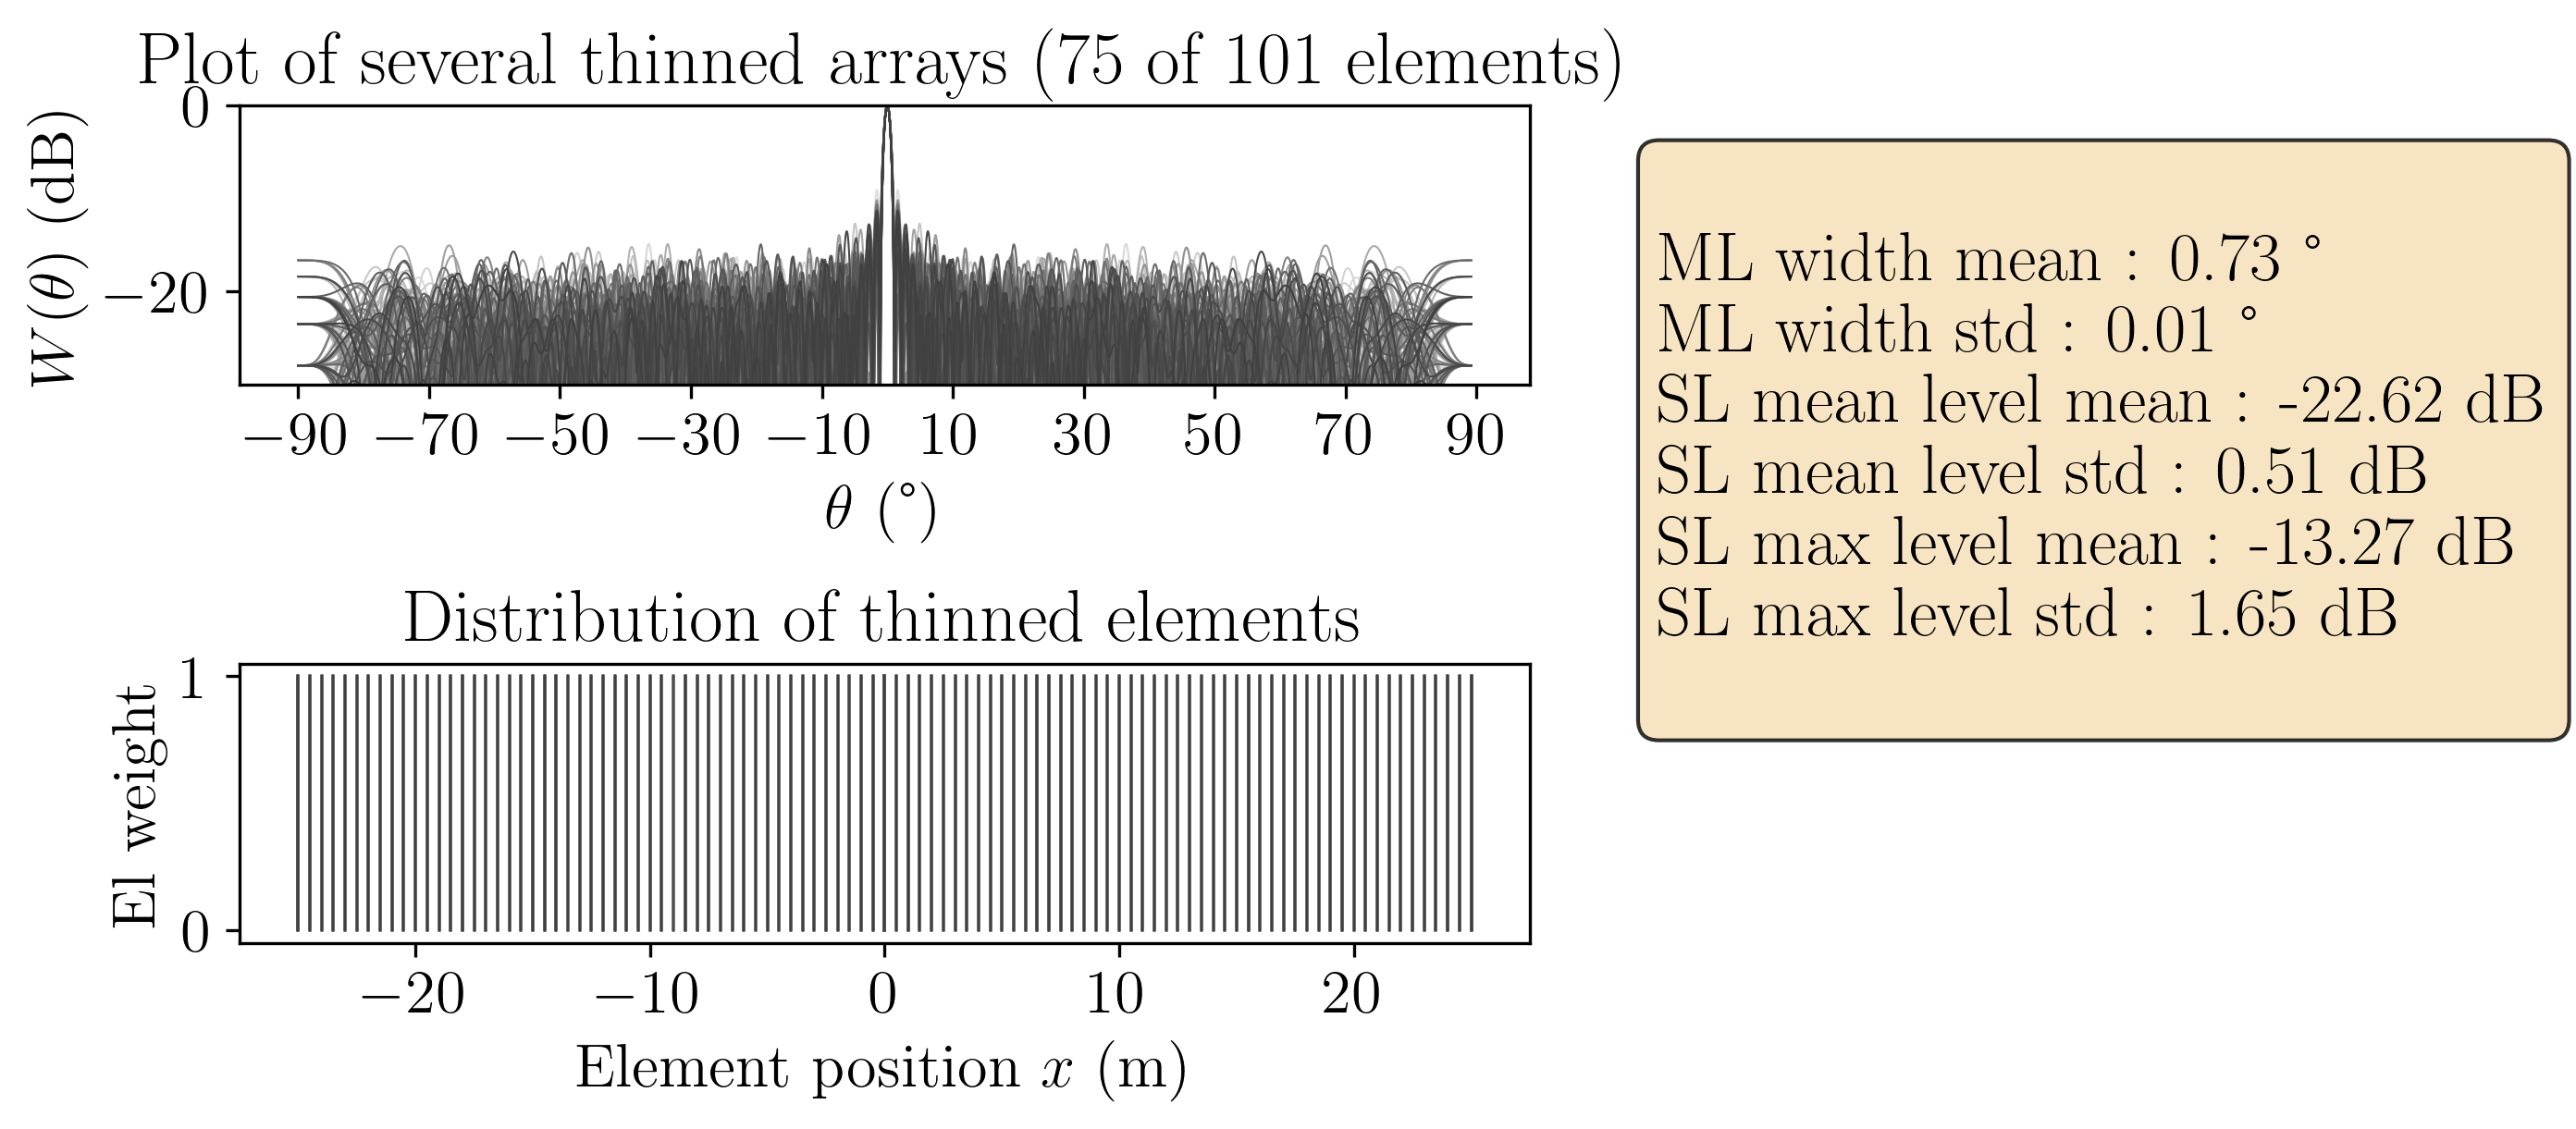

In [253]:
M = 101
NPos = 75
colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    ElPos = get_ElPos(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')


textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)



fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_unif_array_pattern_'+str(NPos)+'.png',dpi=300)

In [254]:
print('Main lobe width')
ML_width_mean = np.mean(ML_widths_list)
ML_width_std = np.std(ML_widths_list)
print('Mean : {:.2f} °'.format(ML_width_mean))
print('Std : {:.2f} °'.format(ML_width_std))

print('Side lobes mean level')
SL_mean_level_mean = np.mean(SL_mean_levels_list)
SL_mean_level_std = np.std(SL_mean_levels_list)
print('Mean : {:.2f} dB'.format(SL_mean_level_mean))
print('Std : {:.2f} dB'.format(SL_mean_level_std))

print('Side lobes max level')
SL_max_level_mean = np.mean(SL_max_levels_list)
SL_max_level_std = np.std(SL_max_levels_list)
print('Mean : {:.2f} dB'.format(SL_max_level_mean))
print('Std : {:.2f} dB'.format(SL_max_level_std))



Main lobe width
Mean : 0.73 °
Std : 0.01 °
Side lobes mean level
Mean : -22.62 dB
Std : 0.51 dB
Side lobes max level
Mean : -13.27 dB
Std : 1.65 dB


In [255]:
# Number of elements
M=101
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Array pattern for d = λ/2
pattern = np.log10(np.abs(array_pattern(positions,weights,k_values))**2)

Text(0.02, 0.5, '$W(\\theta)$ (dB)')

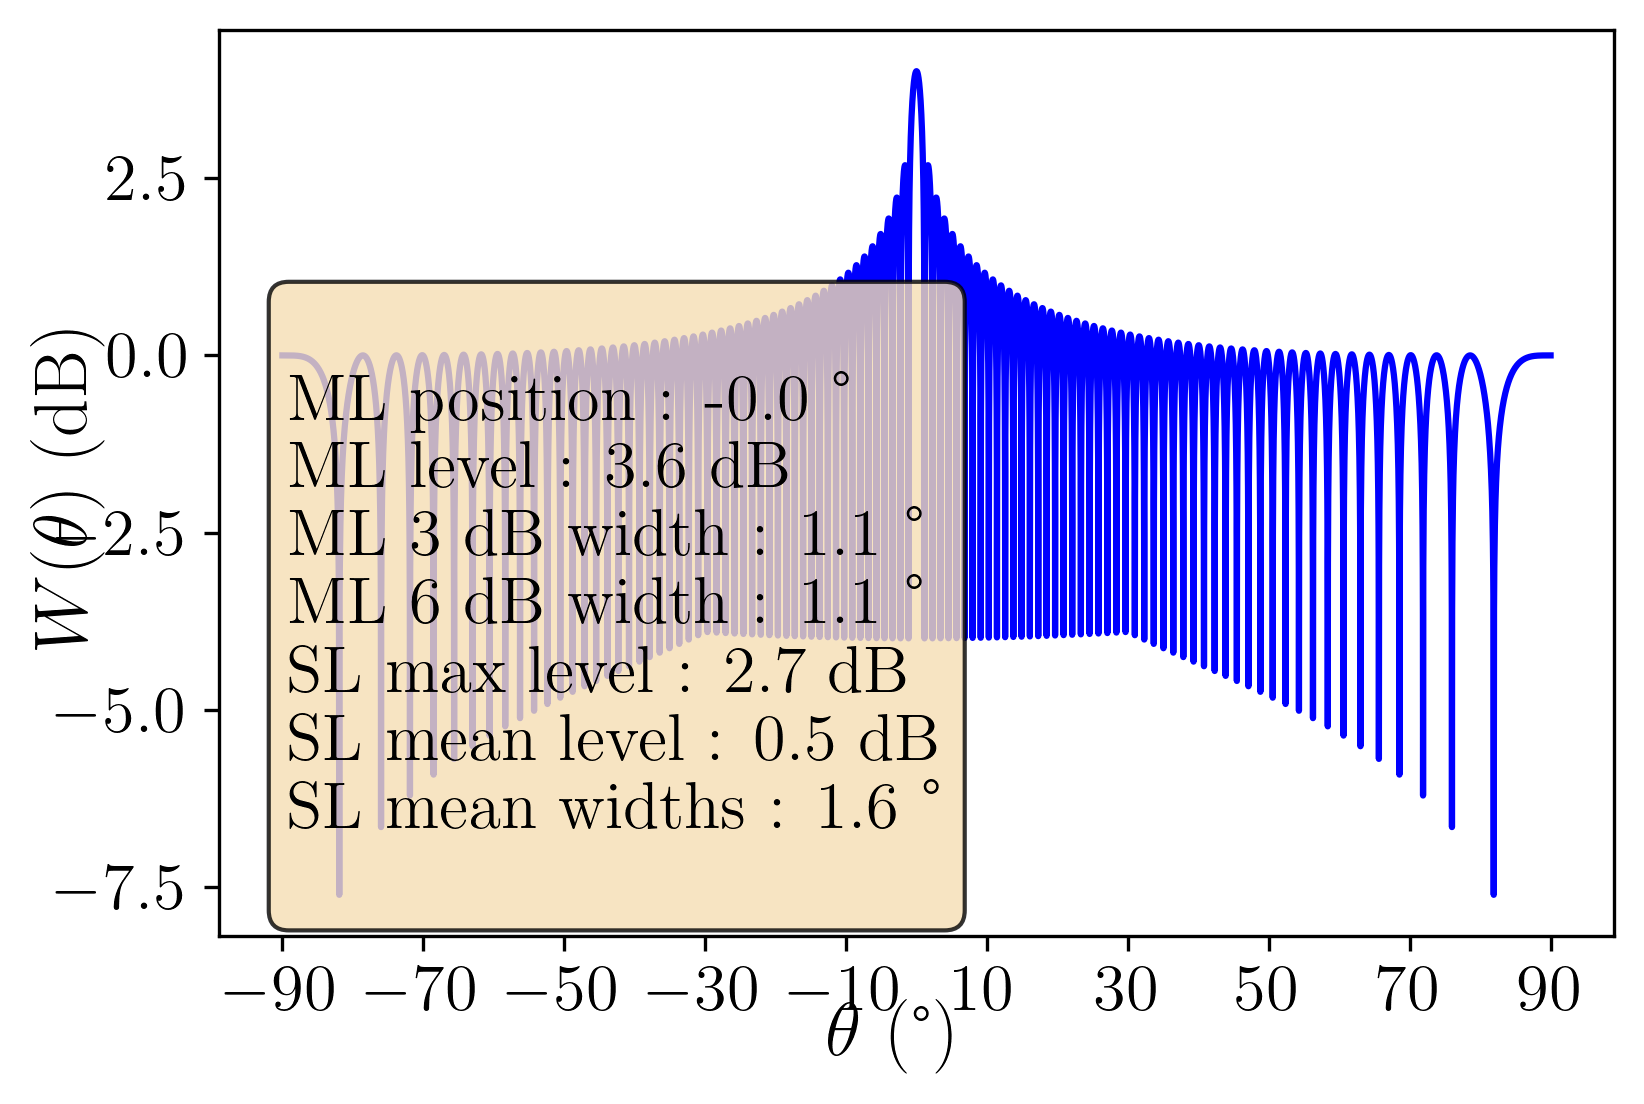

In [256]:
# Create four polar axes and access them through the returned array
fig, ax = plt.subplots(1)

params = get_lobes_positions(pattern,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)


ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern,color='blue')

ax.set_xticks(np.arange(-90,110,20))
textstr = '''
ML position : {:.1f} °
ML level : {:.1f} dB
ML 3 dB width : {:.1f} °
ML 6 dB width : {:.1f} °
SL max level : {:.1f} dB
SL mean level : {:.1f} dB 
SL mean widths : {:.1f} °
'''.format(params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])



# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


fig.supxlabel('$\\theta$ (°)',fontsize=18)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=18)
#fig.suptitle('ULA array pattern for different element spacings',fontsize=46)
#plt.savefig('images/array/ula_patterns.png',dpi=300)

J. F. Hopperstad and S. Holm,"Optimization of sparse arrays by an improved simulated annealing algorithm", Proc. Int. Workshop on Sampling Theory and Applications, pp. 91-95, Loen, Norway, August 1999

In [278]:
weights_fig3 = np.array([1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1])
weights_fig4 = np.array([1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
weights_fig5 = np.array([1,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])

10000
10000
10000 0.0 -3.0
10001 -0.0002813565250365535 -3.0
10002 -0.0011254271028981139 -3.0
10003 -0.0025322147309692986 -3.0
10004 -0.004501724380926779 -3.0
10005 -0.007033962962838155 -3.0
10006 -0.010128939274786761 -3.0
10007 -0.013786663938017873 -3.0
10008 -0.018007149317548515 -3.0
10009 -0.022790409428114097 -3.0
10010 -0.02813645982538853 -3.0
10011 -0.03404531748232691 -3.0
10012 -0.040517000650507166 -3.0
10013 -0.04755152870634366 -3.0
10014 -0.05514892198193902 -3.0
10015 -0.06330920158048875 -3.0
10016 -0.07203238917593378 -3.0
10017 -0.08131850679672153 -3.0
10018 -0.09116757659338587 -3.0
10019 -0.10157962058976026 -3.0
10020 -0.11255466041745013 -3.0
10021 -0.12409271703340602 -3.0
10022 -0.13619381042020037 -3.0
10023 -0.14885795926869888 -3.0
10024 -0.16208518064282396 -3.0
10025 -0.17587548962602528 -3.0
10026 -0.19022889894909434 -3.0
10027 -0.20514541859886795 -3.0
10028 -0.22062505540752644 -3.0
10029 -0.23666781262192518 -3.0
10030 -0.25327368945257306 -3.0


Text(0.02, 0.5, '$W(\\theta)$ (dB)')

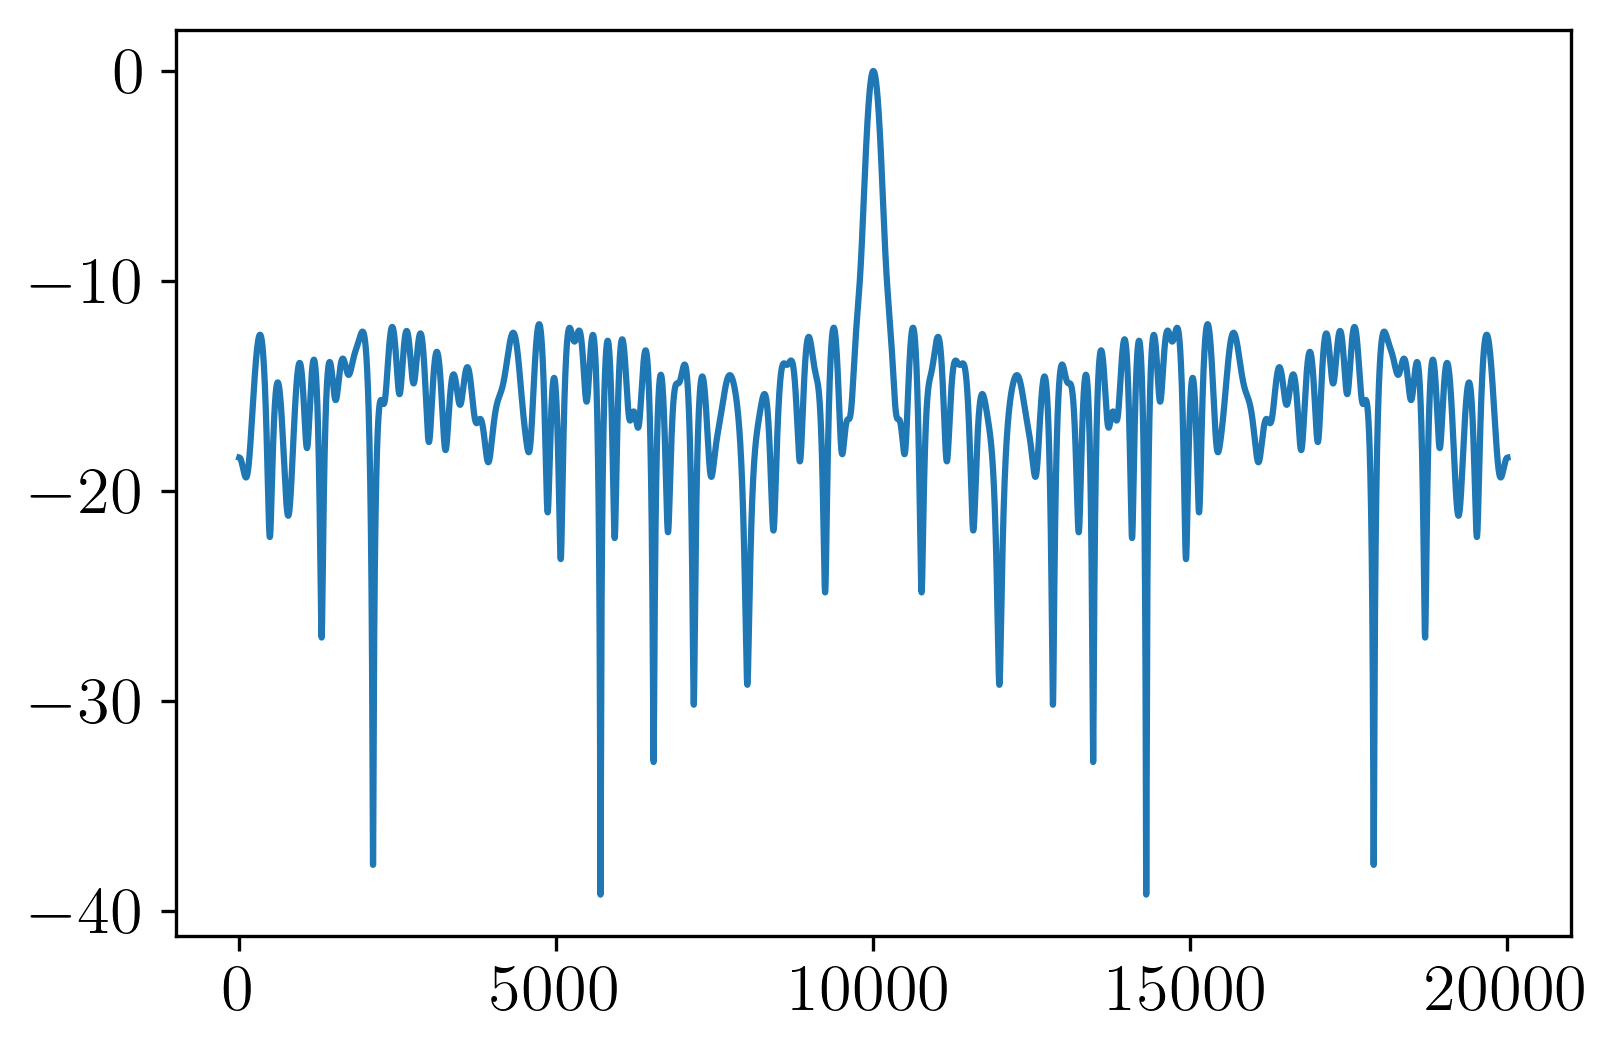

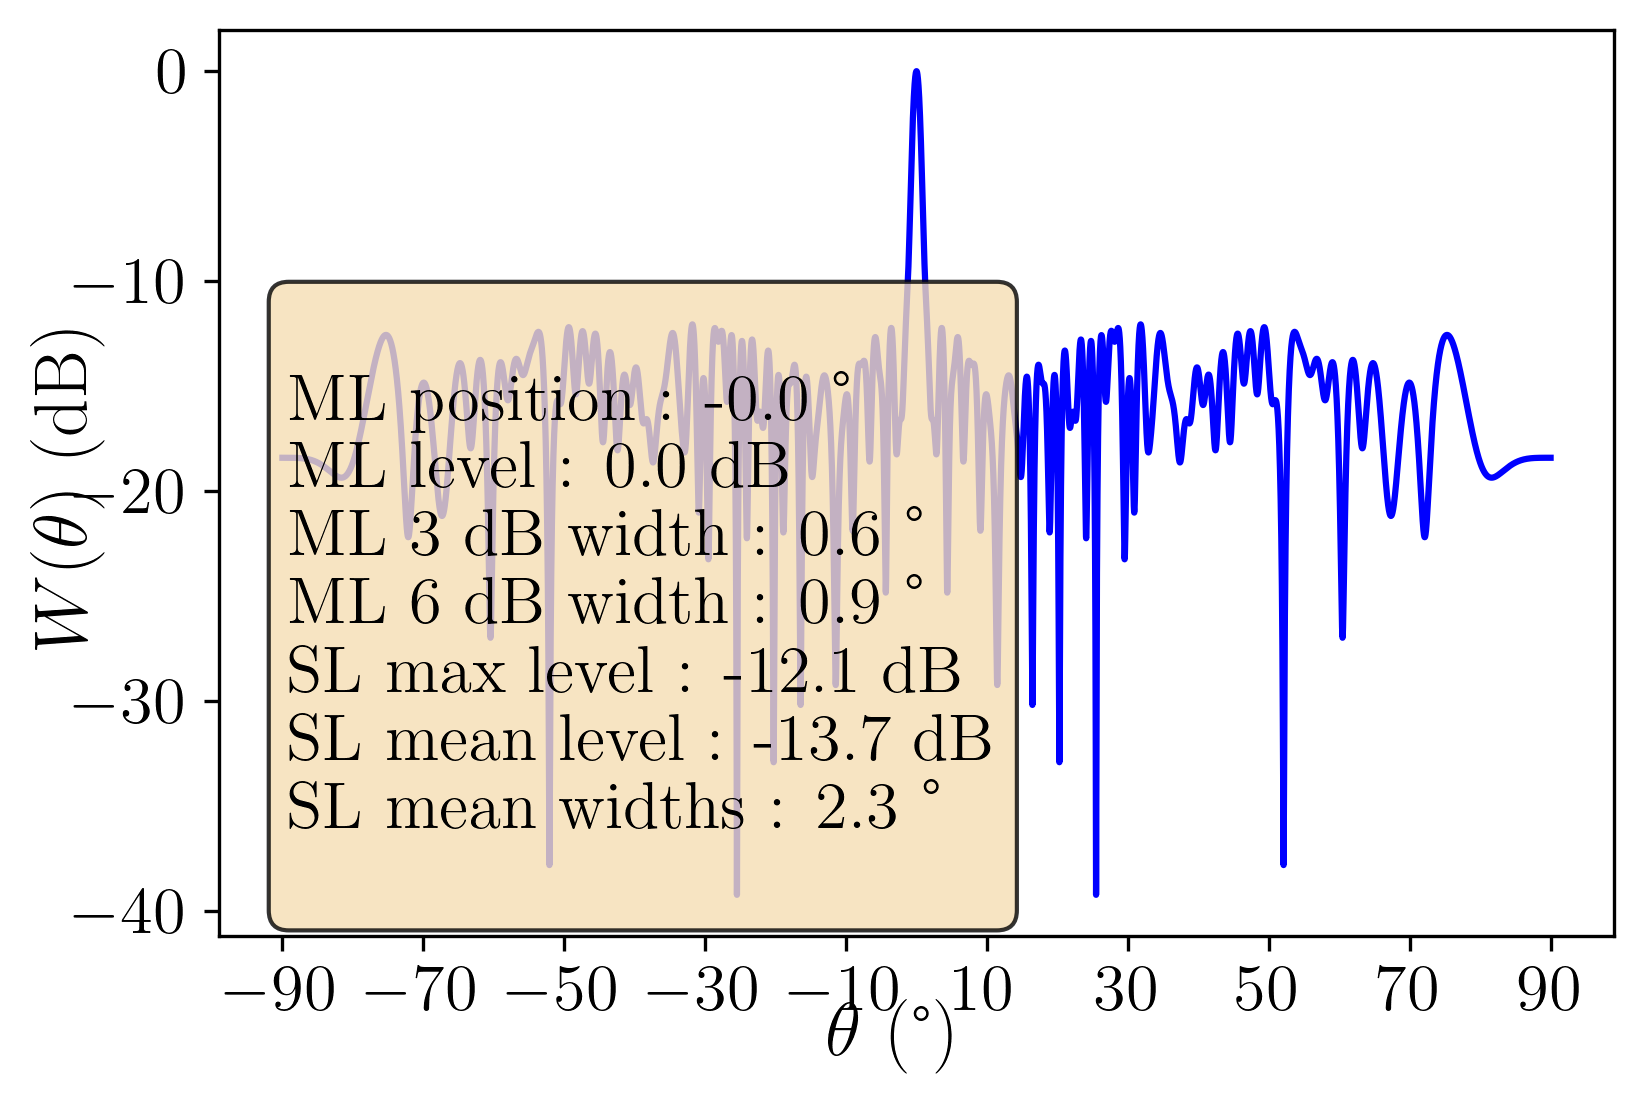

In [289]:
# Number of elements
M=101
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Array pattern for d = λ/4, λ/2, λ, and 2λ.
pattern_fig3 = array_pattern(positions,weights_fig3,k_values)
pattern_fig3 = 20*np.log10(np.abs(pattern_fig3)/np.max(np.abs(pattern_fig3)))
pattern_fig4 = np.log10(np.abs(array_pattern(positions,weights_fig4,k_values))**2)
pattern_fig5 = np.log10(np.abs(array_pattern(positions,weights_fig5,k_values))**2)

plt.plot(pattern_fig3)

# Create four polar axes and access them through the returned array
fig, ax = plt.subplots(1)

params = get_lobes_positions(pattern_fig3,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)


ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern_fig3,color='blue')

ax.set_xticks(np.arange(-90,110,20))
textstr = '''
ML position : {:.1f} °
ML level : {:.1f} dB
ML 3 dB width : {:.1f} °
ML 6 dB width : {:.1f} °
SL max level : {:.1f} dB
SL mean level : {:.1f} dB 
SL mean widths : {:.1f} °
'''.format(params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])



# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


fig.supxlabel('$\\theta$ (°)',fontsize=18)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=18)
#fig.suptitle('ULA array pattern for different element spacings',fontsize=46)
#plt.savefig('images/array/ula_patterns.png',dpi=300)




In [ ]:
N = 100
M = 101
NPos = 25

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos_normal(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)

fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_gaussian_array_pattern_'+str(NPos)+'.png',dpi=300)

In [ ]:
N = 100
M = 101
NPos = 50

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos_normal(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)

fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_gaussian_array_pattern_'+str(NPos)+'.png',dpi=300)

In [ ]:
N = 100
M = 101
NPos = 75

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos_normal(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)

fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_gaussian_array_pattern_'+str(NPos)+'.png',dpi=300)